In [1]:
#Note
#https://www.kaggle.com/code/prashant111/recommender-systems-in-python

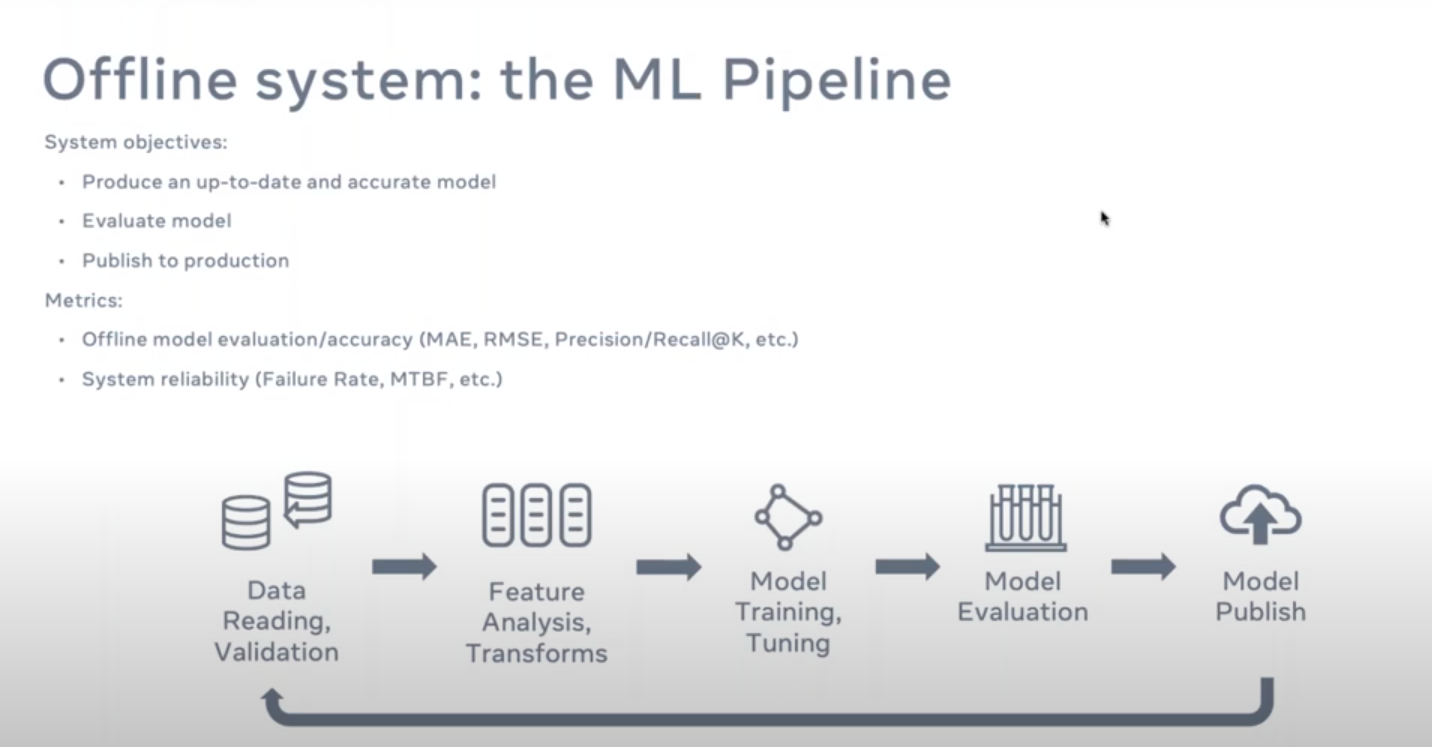

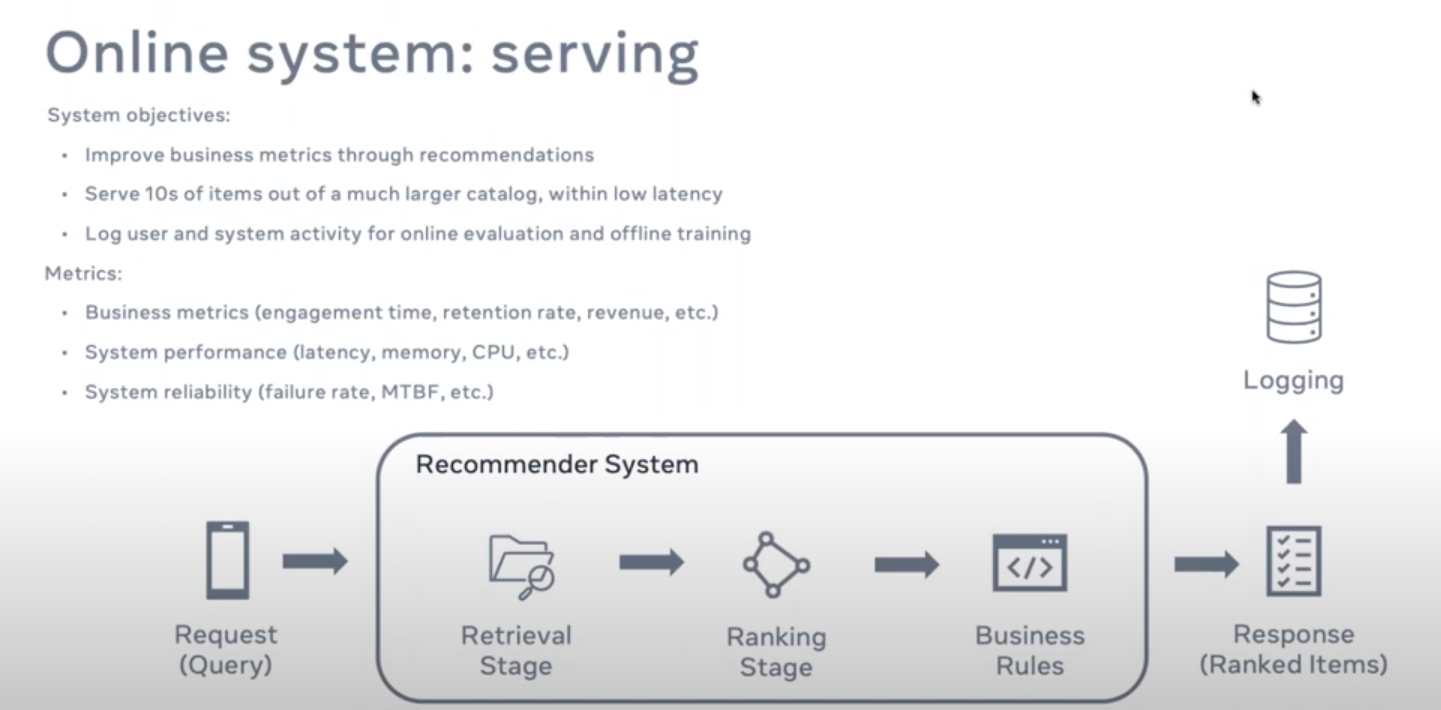

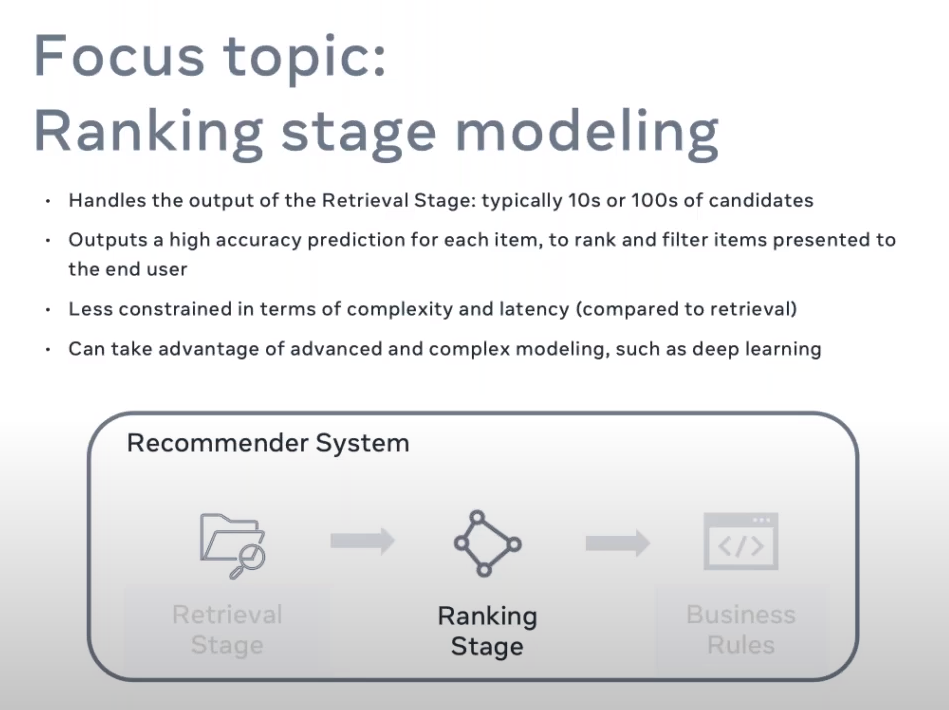

## Recommender Systems

### A recommender system is a data science application that is used to predict or offer products to customers based on their past purchase or browsing history.

### At the core, a recommender system employs a machine learning algorithm whose job is to predict user's ratings for a particular entity.

### It is based on the similarity based on the entities or users that previously rated those entities.

### The idea is that similar types of users are likely to have similar ratings for a set of entities.

### Recommender Systems Mechanism 

#### Basically, a recommendation engine filters the data using different algorithms and recommends the most relevant items to users.

#### It first studies the past behaviour of a customer and based on that recommends products which he might buy.

#### The working of a recommendation engine can be categorized in three steps-
#### 1. Data collection
#### 2. Data storage
#### 3. Filtering the data

####  There are two major approaches to filter the data to extract relevant information. These are as follows:-

####  a. Collaborative Filtering – based on similar users.
####  b. Content-Based Filtering – based on product attributes.

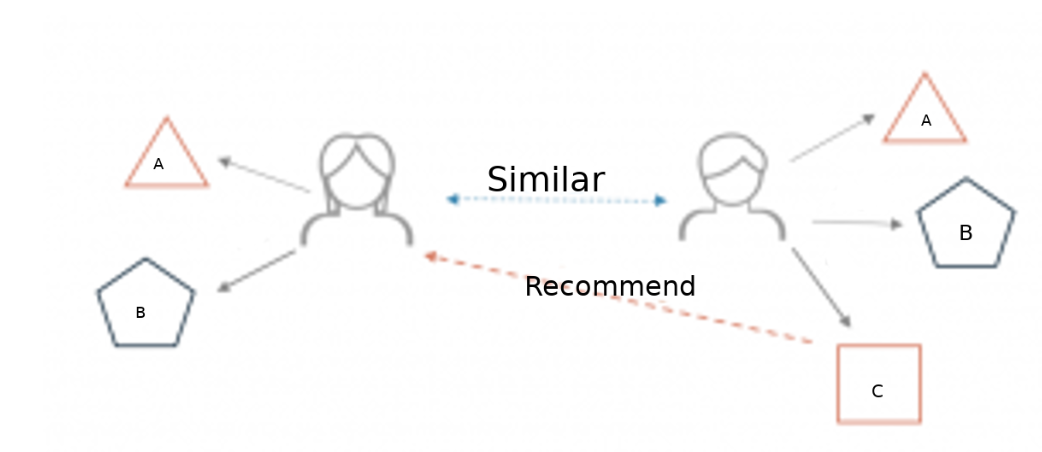

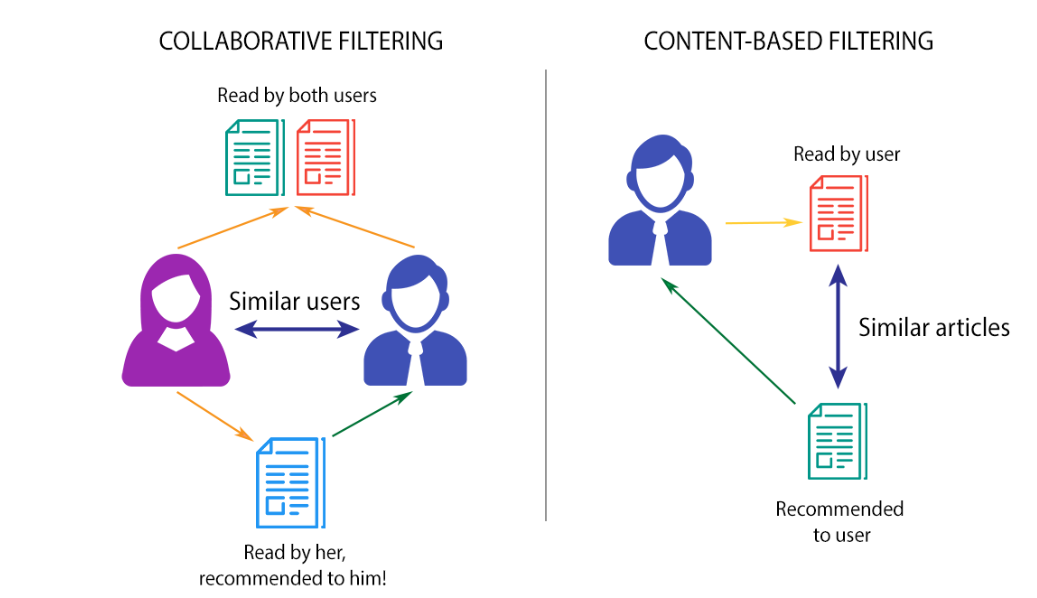

###  Collaborative Filtering Recommender System

#### Collaborative filtering approach build a model from a user’s past behaviour (items previously purchased or selected and/or numerical ratings given to those items) as well as similar decisions made by other users.
#### This model is then used to predict items (or ratings for items) that the user may have an interest in.
#### It recommends based on the user’s rating in the past.
#### These systems try to predict the user’s rating or preferences based on past rating or preferences of other users.

### There are two types of collaborative filtering recommender system. They are:-
#### 1. User-based collaborative filtering:  In this method products are recommended to a user based on the fact that the products have been liked by users similar to the user.
#### 2. Item-based collaborative filtering:  This method identifies and predict similar items based on users’ previous ratings.

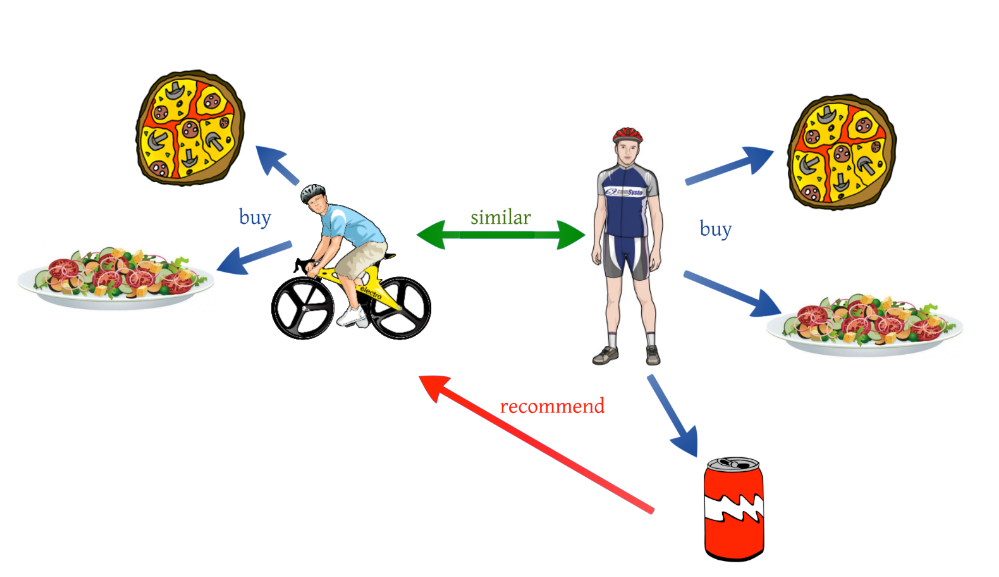

#### Collaborative filtering methods are also classified as memory-based and model-based
#### An example of memory-based approach is the user-based algorithm while that of model-based approach is Kernel-Mapping Recommender.
#### Collaborative filtering approaches often suffer from three problems -

#### cold start
#### scalability
#### sparsity

###  Content-based Filtering Recommender System 
#### Content-based filtering methods are based on a description of the item and a profile of the user’s preferences.
#### These methods are best suited to situations where there is known data on an item (name, location, description, etc.), but not on the user.

#### These methods are best suited to situations where there is known data on an item (name, location, description, etc.), but not on the user.

#### In content based filtering recommender system, the similarity between different products is calculated on the basis of the attributes of the products.

#### The system uses the knowledge of each product to recommend a new product.

#### Content-based filtering approaches utilize a series of discrete characteristics of an item in order to recommend additional items with similar properties.

#### For example, in a content based movie recommender system, the similarities between the movies is calculated on the basis of genres, the actors and the director.

#### The general idea behind these recommender systems is that if a person liked a particular item, then he will also like an item similar to it.

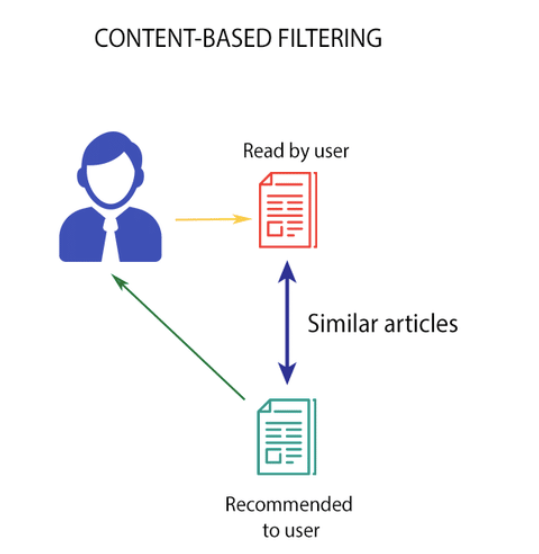

### Evaluating Recommender Systems

#### Once we develop a recommender system, we want to evaluate them.

#### Evaluation is important in assessing the effectiveness of recommender systems.

#### To measure the effectiveness of recommender systems, three types of evaluations are available –

#### 1. user studies,
#### 2. online evaluations (A/B tests), and
#### 3. offline evaluations.


#### Beyond measures of accuracy
#### Research on recommender systems is focussed towards finding the most accurate recommendation algorithms. There are a number of factors that are also important. These are discussed below.

#### Diversity – Users tend to be more satisfied with recommendations when there is a higher intra-list diversity. For example, items from different artists.

#### Recommender persistence – Sometimes, it is more effective to re-show recommendations than showing new items. There are several reasons for this. Users may ignore items when they are shown for the first time. May be they do not inspect the recommendations initially.

#### Privacy – Recommender systems usually have to deal with privacy concerns because users have to reveal sensitive information.

#### User demographics – User demographics may influence how satisfied users are with recommendations.

#### Robustness – When users can participate in the recommender system, the issue of fraud must be addressed.

#### Serendipity – Serendipity is a measure of how surprising the recommendations are. For instance, a recommender system that recommends milk to a customer in a grocery store might be perfectly accurate. But it is not a good recommendation because it is an obvious item for the customer to buy.

#### Trust – A recommender system is of little value for a user if the user does not trust the system. Trust can be built by a recommender system by explaining how it generates recommendations, and why it recommends an item.

#### Labelling – User satisfaction with recommendations may be influenced by the labelling of the recommendations.

## Neural Collaborative Filtering (NCF)

### Neural Collaborative Filtering (NCF) is a well known recommendation algorithm that generalizes the matrix factorization problem with multi-layer perceptron.

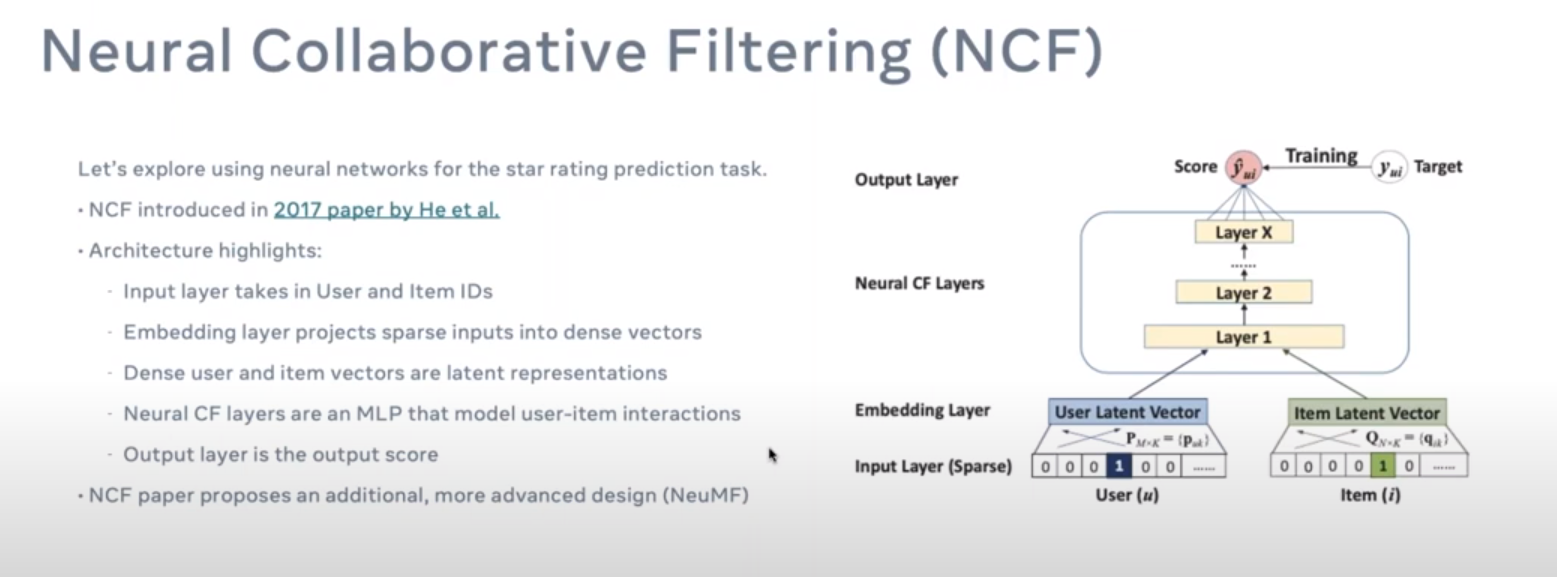

# Content Based Recommender System

In [95]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt # data visualization
import seaborn as sns           # statistical data visualization
%matplotlib inline
plt.style.use('fivethirtyeight')
pd.set_option('display.max_colwidth', None)

In [96]:
movies = pd.read_csv('C:/BITsPilaniMTECH2123/Sem2/ML/ML_Practice_2023/data/tmdb_5000_movies.csv')
credits = pd.read_csv('C:/BITsPilaniMTECH2123/Sem2/ML/ML_Practice_2023/data/tmdb_5000_credits.csv')

In [97]:
movies.head(2)

budget  \
0  237000000   
1  300000000   

                                                                                                                                   genres  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]   
1                                          [{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]   

                                       homepage     id  \
0                   http://www.avatarmovie.com/  19995   
1  http://disney.go.com/disneypictures/pirates/    285   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          keywords  \
0  [{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]   
1                                                                                                                                                   [{"id": 270, "name": "ocean"}, {"id": 726, "name": "drug abuse"}, {"id": 911, "name": "exotic island"}, {"id": 1319, "name": "east india trading company"}, {"id": 2038, "name": "love of one's life"}, {"id": 2052, "name": "traitor"}, {"id": 2580, "name": "shipwreck"}, {"id": 2660, "name": "strong woman"}, {"id": 3799, "name": "ship"}, {"id": 5740, "name": "alliance"}, {"id": 5941, "name": "calypso"}, {"id": 6155, "name": "afterlife"}, {"id": 6211, "name": "fighter"}, {"id": 12988, "name": "pirate"}, {"id": 157186, "name": "swashbuckler"}, {"id": 179430, "name": "aftercreditsstinger"}]   

  original_language                            original_title  \
0                en                                    Avatar   
1                en  Pirates of the Caribbean: At World's End   

                                                                                                                                                                           overview  \
0   In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.   
1  Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.   

   popularity  \
0  150.437577   
1  139.082615   

                                                                                                                                                                                          production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name":

In [98]:
credits.head(2)

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [99]:
movies = movies.merge(credits,on='title')
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]
movies.head(2)

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   

                                                                                                                                                                           overview  \
0   In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.   
1  Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.   

                                                                                                                                   genres  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]   
1                                          [{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          keywords  \
0  [{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]   
1                                                                                                                                                   [{"id": 270, "name": "ocean"}, {"id": 726, "name": "drug abuse"}, {"id": 911, "name": "exotic island"}, {"id": 1319, "name": "east india trading company"}, {"id": 2038, "name": "love of one's life"}, {"id": 2052, "name": "traitor"}, {"id": 2580, "name": "shipwreck"}, {"id": 2660, "name": "strong woman"}, {"id": 3799, "name": "ship"}, {"id": 5740, "name": "alliance"}, {"id": 5941, "name": "calypso"}, {"id": 6155, "name": "afterlife"}, {"id": 6211, "name": "fighter"}, {"id": 12988, "name": "pirate"}, {"id": 157186, "name": "swashbuckler"}, {"id": 179430, "name": "aftercreditsstinger"}]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [100]:
movies.dropna(inplace=True)
movies.shape

(4806, 7)

In [101]:
import ast
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L

In [102]:
movies['genres'] = movies['genres'].apply(convert)
movies.head(1)

movie_id   title  \
0     19995  Avatar   

                                                                                                                                                                          overview  \
0  In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.   

                                          genres  \
0  [Action, Adventure, Fantasy, Science Fiction]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          keywords  \
0  [{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [103]:
movies['keywords'] = movies['keywords'].apply(convert)
movies.head(1)

movie_id   title  \
0     19995  Avatar   

                                                                                                                                                                          overview  \
0  In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.   

                                          genres  \
0  [Action, Adventure, Fantasy, Science Fiction]   

                                                                                                                                                                                                                   keywords  \
0  [culture clash, future, space war, space colony, society, space travel, futuristic, romance, space, alien, tribe, alien planet, cgi, marine, soldier, battle, love affair, anti war, power relations, mind and soul, 3d]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [60]:
def convert3(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
        counter+=1
    return L 

In [104]:
movies['cast'] = movies['cast'].apply(convert)
movies.head(1)

movie_id   title  \
0     19995  Avatar   

                                                                                                                                                                          overview  \
0  In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.   

                                          genres  \
0  [Action, Adventure, Fantasy, Science Fiction]   

                                                                                                                                                                                                                   keywords  \
0  [culture clash, future, space war, space colony, society, space travel, futuristic, romance, space, alien, tribe, alien planet, cgi, marine, soldier, battle, love affair, anti war, power relations, mind and soul, 3d]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             cast  \
0  [Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang, Michelle Rodriguez, Giovanni Ribisi, Joel David Moore, CCH Pounder, Wes Studi, Laz Alonso, Dileep Rao, Matt Gerald, Sean Anthony Moran, Jason Whyte, Scott Lawrence, Kelly Kilgour, James Patrick Pitt, Sean Patrick Murphy, Peter Dillon, Kevin Dorman, Kelson Henderson, David Van Horn, Jacob Tomuri, Michael Blain-Rozgay, Jon Curry, Luke Hawker, Woody Schultz, Peter Mensah, Sonia Yee, Jahnel Curfman, Ilram Choi, Kyla Warren, Lisa Roumain, Debra Wilson, Chris Mala, Taylor Kibby, Jodie Landau, Julie Lamm, Cullen B. Madden, Joseph Brady Madden, Frankie Torres, Austin Wilson, Sara Wilson, Tamica Washington-Miller, Lucy Briant, Nathan Meister, Gerry Blair, Matthew Chamberlain, Paul Yates, Wray Wilson, James Gaylyn, Melvin Leno Clark III, Carvon Futrell, Brandon Jelkes, Micah Moch, Hanniyah Muhammad, Christopher Nolen, Christa Oliver, April Marie Thomas, Bravita A. Threatt, Colin Bleasdale, Mike Bodnar, Matt Clayton, Nicole Dionne, Jamie Harrison, Allan Henry, Anthony Ingruber, Ashley Jeffery, Dean Knowsley, Joseph Mika-Hunt, Terry Notary, Kai Pantano, Logan Pithyou, Stuart Pollock, Raja, Gareth Ruck, Rhian Sheehan, T. J. Storm, Jodie Taylor, Alicia Vela-Bailey, Richard Whiteside, Nikie Zambo, Julene Renee]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [105]:
movies['cast'] = movies['cast'].apply(lambda x:x[0:3])

In [106]:
movies.head(2)

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   

                                                                                                                                                                           overview  \
0   In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.   
1  Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.   

                                          genres  \
0  [Action, Adventure, Fantasy, Science Fiction]   
1                   [Adventure, Fantasy, Action]   

                                                                                                                                                                                                                   keywords  \
0  [culture clash, future, space war, space colony, society, space travel, futuristic, romance, space, alien, tribe, alien planet, cgi, marine, soldier, battle, love affair, anti war, power relations, mind and soul, 3d]   
1              [ocean, drug abuse, exotic island, east india trading company, love of one's life, traitor, shipwreck, strong woman, ship, alliance, calypso, afterlife, fighter, pirate, swashbuckler, aftercreditsstinger]   

                                               cast  \
0  [Sam Worthington, Zoe Saldana, Sigourney Weaver]   
1     [Johnny Depp, Orlando Bloom, Keira Knightley]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [107]:
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L 

In [108]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [109]:
movies.sample(5)

movie_id                   title  \
1571     22947           Up in the Air   
751      16558               Duplicity   
3444       218          The Terminator   
3115     31007   Welcome to the Rileys   
3361      2074  Flirting with Disaster   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    overview  \
1571                                  George Clooney plays the dry cynical character of Ryan Bingham, an executive who specializes in "downsizing". Ryan lives out of his suitcase, traveling the country for the sole purpose terminating unwanted employees day after day. Just as Ryan is about to reach his life-long goal of the ten million mile frequent flyer mark some major changes come his way. Changes that threaten to crack the cold heartless exterior that is Ryan Bingham.   
751                                                                                                                                                                                                                                                                      Two romantically-engaged corporate spies team up to manipulate a corporate race to corner the market on a medical innovation that will reap huge profits and enable them to lead an extravagant lifestyle together.   
3444                                                                                   In the post-apocalyptic future, reigning tyrannical supercomputers teleport a cyborg assassin known as the "Terminator" back to 1984 to kill Sarah Connor, whose unborn son is destined to lead insurgents against 21st century mechanical hegemony. Meanwhile, the human-resistance movement dispatches a lone warrior to safeguard Sarah. Can he stop the virtually indestructible killing machine?   
3115                                                                                                                                                                 Years after their teenage daughter’s death, Lois and Doug Riley, an upstanding Indiana couple, are frozen by estranging grief. Doug escapes to New Orleans on a business trip. Compelled by urgencies he doesn’t understand, he insinuates himself into the life of an underage hooker, becoming her platonic guardian.   
3361  Adopted as a child, new father Mel Colpin (Ben Stiller) decides he cannot name his son until he knows his birth parents, and determines to make a cross-country quest to find them. Accompanied by his wife, Nancy (Patricia Arquette), and an inept yet gorgeous adoption agent, Tina (Tea Leoni), he departs on an epic road trip that quickly devolves into a farce of mistaken identities, wrong turns, and overzealous and love-struck ATF agents (Josh Brolin, Richard Jenkins).   

                                   genres  \
1571                     [Drama, Romance]   
751              [Romance, Comedy, Crime]   
3444  [Action, Thriller, Science Fiction]   
3115                              [Drama]   
3361                    [Comedy, Romance]   

                                                                                                                                                       keywords  \
1571                                                                  [suitcase, business, omaha, on the road, downsizing, cross country, duringcreditsstinger]   
751                                                                                                                                                       [spy]   
3444  [saving the world, artificial intelligence, rebel, cyborg, shotgun, killer robot, sun glasses, dystopia, c

In [110]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [111]:
movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)

In [113]:
movies.head(1)

movie_id   title  \
0     19995  Avatar   

                                                                                                                                                                          overview  \
0  In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.   

                                         genres  \
0  [Action, Adventure, Fantasy, ScienceFiction]   

                                                                                                                                                                                                         keywords  \
0  [cultureclash, future, spacewar, spacecolony, society, spacetravel, futuristic, romance, space, alien, tribe, alienplanet, cgi, marine, soldier, battle, loveaffair, antiwar, powerrelations, mindandsoul, 3d]   

                                            cast            crew  
0  [SamWorthington, ZoeSaldana, SigourneyWeaver]  [JamesCameron]

In [114]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())

In [115]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [116]:
movies.head(1)

movie_id   title  \
0     19995  Avatar   

                                                                                                                                                                                                       overview  \
0  [In, the, 22nd, century,, a, paraplegic, Marine, is, dispatched, to, the, moon, Pandora, on, a, unique, mission,, but, becomes, torn, between, following, orders, and, protecting, an, alien, civilization.]   

                                         genres  \
0  [Action, Adventure, Fantasy, ScienceFiction]   

                                                                                                                                                                                                         keywords  \
0  [cultureclash, future, spacewar, spacecolony, society, spacetravel, futuristic, romance, space, alien, tribe, alienplanet, cgi, marine, soldier, battle, loveaffair, antiwar, powerrelations, mindandsoul, 3d]   

                                            cast            crew  \
0  [SamWorthington, ZoeSaldana, SigourneyWeaver]  [JamesCameron]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                tags  
0  [In, the, 22nd, century,, a, paraplegic, Marine, is, dispatched, to, the, moon, Pandora, on, a, unique, mission,, but, becomes, torn, between, following, orders, and, protecting, an, alien, civilization., Action, Adventure, Fantasy, ScienceFiction, cultureclash, future, spacewar, spacecolony, society, spacetravel, futuristic, romance, space, alien, tribe, alienplanet, cgi, marine, soldier, battle, loveaffair, antiwar, powerrelations, mindandsoul, 3d, SamWorthington, ZoeSaldana, SigourneyWeaver, JamesCameron]

In [117]:
new = movies.drop(columns=['overview','genres','keywords','cast','crew'])

In [118]:
new['tags'] = new['tags'].apply(lambda x: " ".join(x))
new.head(1)

movie_id   title  \
0     19995  Avatar   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                      tags  
0  In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron

In [123]:
#Vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [124]:
vector = cv.fit_transform(new['tags']).toarray()

In [125]:
vector.shape

(4806, 5000)

In [126]:
pd.DataFrame(vector)

0     1     2     3     4     5     6     7     8     9     ...  4990  \
0        0     0     0     0     0     0     0     0     0     0  ...     0   
1        0     0     0     0     0     0     0     0     0     0  ...     0   
2        0     0     0     0     0     0     0     0     0     0  ...     0   
3        0     0     0     0     0     0     0     0     0     0  ...     0   
4        0     0     0     0     0     0     0     0     0     0  ...     0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
4801     0     0     0     0     0     0     0     0     0     0  ...     0   
4802     0     0     0     0     0     0     0     0     0     0  ...     0   
4803     0     0     0     0     0     0     0     0     0     0  ...     0   
4804     0     0     0     0     0     0     0     0     0     0  ...     0   
4805     0     0     0     0     0     0     0     0     0     0  ...     0   

      4991  4992  4993  4994  4995  4996  4997  4998  4999  
0        0     0     0     1     0     0     0     0     0  
1        0     0     0     0     0     0     0     0     0  
2        0     0     0     0     0     0     0     0     0  
3        0     0     0     0     0     0     0     0     0  
4        0     0     0     0     0     0     0     0     0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
4801     0     0     0     0     0     0     0     0     0  
4802     0     0     0     0     0     0     0     0     0  
4803     0     0     0     0     0     0     0     0     0  
4804     0     0     0     0     0     0     0     0     0  
4805     0     0     0     0     0     0     0     0     0  

[4806 rows x 5000 columns]

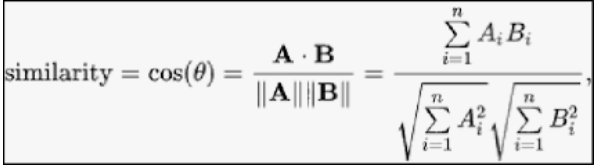

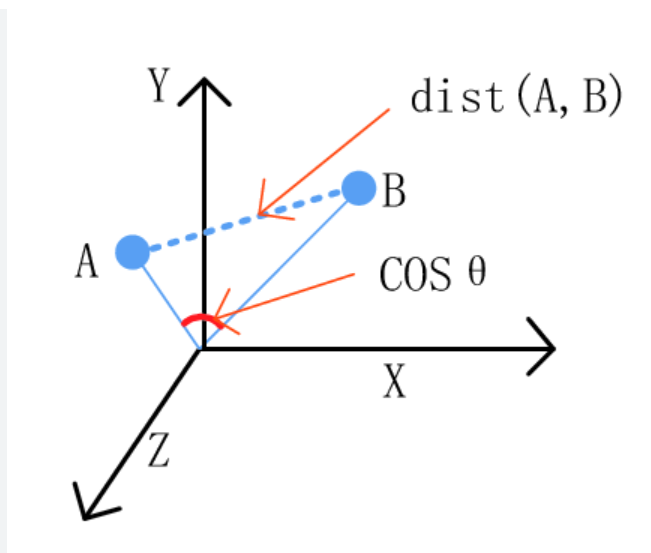

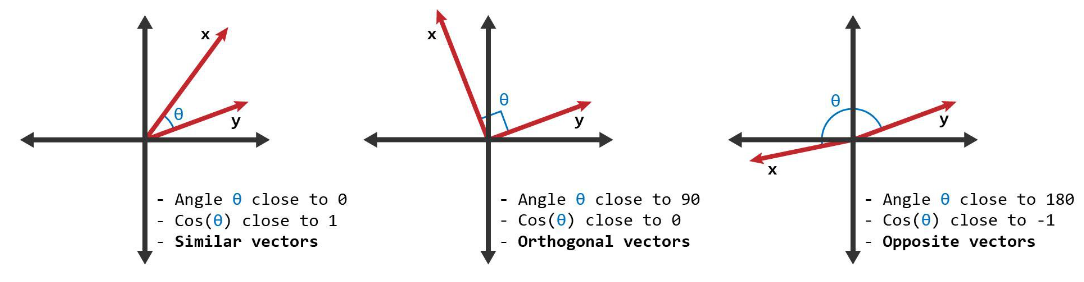

In [77]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)
similarity

C:\Users\Abhishek Jaiswal\.conda\envs\mlenv\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


array([[1.        , 0.08964215, 0.06071767, ..., 0.02519763, 0.0277885 ,
        0.        ],
       [0.08964215, 1.        , 0.06350006, ..., 0.02635231, 0.        ,
        0.        ],
       [0.06071767, 0.06350006, 1.        , ..., 0.02677398, 0.        ,
        0.        ],
       ...,
       [0.02519763, 0.02635231, 0.02677398, ..., 1.        , 0.07352146,
        0.04774099],
       [0.0277885 , 0.        , 0.        , ..., 0.07352146, 1.        ,
        0.05264981],
       [0.        , 0.        , 0.        , ..., 0.04774099, 0.05264981,
        1.        ]])

In [127]:
pd.DataFrame(similarity)

0         1         2         3         4         5         6     \
0     1.000000  0.089642  0.060718  0.039841  0.182574  0.118345  0.023218   
1     0.089642  1.000000  0.063500  0.020833  0.081832  0.123768  0.024282   
2     0.060718  0.063500  1.000000  0.042333  0.083141  0.075449  0.024671   
3     0.039841  0.020833  0.042333  1.000000  0.036370  0.049507  0.048564   
4     0.182574  0.081832  0.083141  0.036370  1.000000  0.064820  0.063586   
...        ...       ...       ...       ...       ...       ...       ...   
4801  0.024922  0.026064  0.052963  0.052129  0.022751  0.020646  0.040505   
4802  0.053452  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4803  0.025198  0.026352  0.026774  0.052705  0.023002  0.020874  0.000000   
4804  0.027789  0.000000  0.000000  0.058124  0.000000  0.023020  0.022582   
4805  0.000000  0.000000  0.000000  0.056614  0.000000  0.022422  0.021995   

          7         8         9     ...      4796      4797      4798  \
0     0.176383  0.063888  0.077331  ...  0.000000  0.000000  0.021296   
1     0.131762  0.066815  0.080875  ...  0.000000  0.000000  0.022272   
2     0.160644  0.067884  0.054779  ...  0.048002  0.000000  0.000000   
3     0.070273  0.022272  0.233638  ...  0.031497  0.028583  0.014848   
4     0.184017  0.029161  0.094124  ...  0.041239  0.000000  0.000000   
...        ...       ...       ...  ...       ...       ...       ...   
4801  0.065938  0.055728  0.022485  ...  0.000000  0.071520  0.000000   
4802  0.000000  0.000000  0.000000  ...  0.000000  0.076696  0.000000   
4803  0.000000  0.056344  0.045466  ...  0.079682  0.036155  0.056344   
4804  0.000000  0.062137  0.025071  ...  0.000000  0.039873  0.000000   
4805  0.000000  0.060523  0.024419  ...  0.000000  0.000000  0.000000   

          4799      4800      4801      4802      4803      4804      4805  
0     0.058849  0.000000  0.024922  0.053452  0.025198  0.027789  0.000000  
1     0.000000  0.000000  0.026064  0.000000  0.026352  0.000000  0.000000  
2     0.000000  0.021467  0.052963  0.000000  0.026774  0.000000  0.000000  
3     0.041030  0.028172  0.052129  0.000000  0.052705  0.058124  0.056614  
4     0.026861  0.000000  0.022751  0.000000  0.023002  0.000000  0.000000  
...        ...       ...       ...       ...       ...       ...       ...  
4801  0.025666  0.035245  1.000000  0.000000  0.000000  0.024239  0.000000  
4802  0.000000  0.000000  0.000000  1.000000  0.094281  0.051988  0.000000  
4803  0.051900  0.000000  0.000000  0.094281  1.000000  0.073521  0.047741  
4804  0.000000  0.000000  0.024239  0.051988  0.073521  1.000000  0.052650  
4805  0.000000  0.000000  0.000000  0.000000  0.047741  0.052650  1.000000  

[4806 rows x 4806 columns]

In [78]:
new[new['title'] == 'The Lego Movie'].index[0]

744

In [128]:
new.head(2)

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                      tags  
0  In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron  
1                        Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems. Adventure Fantasy Action ocean drugabuse exoticisland eastindiatradingcompany loveofone'slife traitor shipwreck strongwoman ship alliance calypso afterlife fighter pirate swashbuckler aftercreditsstinger JohnnyDepp OrlandoBloom KeiraKnightley GoreVerbinski

In [79]:
def recommend(movie):
    index = new[new['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(new.iloc[i[0]].title)

In [80]:
recommend('Gandhi')

Gandhi, My Father
The Wind That Shakes the Barley
A Passage to India
Guiana 1838
Ramanujan


In [129]:
import pickle
#pickle.dump(new,open('movie_list.pkl','wb'))
#pickle.dump(similarity,open('similarity.pkl','wb'))

# Recommender System

In [131]:
import numpy as np
import pandas as pd

In [132]:
books = pd.read_csv('C:/BITsPilaniMTECH2123/Sem2/ML/ML_Practice_2023/data/books.csv')
users = pd.read_csv('C:/BITsPilaniMTECH2123/Sem2/ML/ML_Practice_2023/data/users.csv')
ratings = pd.read_csv('C:/BITsPilaniMTECH2123/Sem2/ML/ML_Practice_2023/data/ratings.csv')

C:\Users\Abhishek Jaiswal\AppData\Local\Temp\ipykernel_10272\1400537676.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('C:/BITsPilaniMTECH2123/Sem2/ML/ML_Practice_2023/data/books.csv')


In [134]:
users.head(2)

User-ID                   Location   Age
0        1         nyc, new york, usa   NaN
1        2  stockton, california, usa  18.0

In [135]:
books.head(2)

ISBN           Book-Title           Book-Author Year-Of-Publication  \
0  0195153448  Classical Mythology    Mark P. O. Morford                2002   
1  0002005018         Clara Callan  Richard Bruce Wright                2001   

                 Publisher  \
0  Oxford University Press   
1    HarperFlamingo Canada   

                                                    Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg   
1  http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg   

                                                    Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg   
1  http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg   

                                                    Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg  
1  http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg

In [136]:
ratings.head(2)

User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5

In [137]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [138]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [139]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [140]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [141]:
books.duplicated().sum()

0

In [149]:
## Popularity Based Recommender System
ratings_with_name = ratings.merge(books,on='ISBN')
ratings_with_name = ratings_with_name.dropna()
ratings_with_name.head(2)

User-ID        ISBN  Book-Rating            Book-Title Book-Author  \
0   276725  034545104X            0  Flesh Tones: A Novel  M. J. Rose   
1     2313  034545104X            5  Flesh Tones: A Novel  M. J. Rose   

  Year-Of-Publication         Publisher  \
0                2002  Ballantine Books   
1                2002  Ballantine Books   

                                                    Image-URL-S  \
0  http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg   
1  http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg   

                                                    Image-URL-M  \
0  http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg   
1  http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg   

                                                    Image-URL-L  
0  http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg  
1  http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg

In [150]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

Book-Title  \
0        A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)   
1                                                                                            Always Have Popsicles   
2                                                                             Apple Magic (The Collector's series)   
3                                                             Ask Lily (Young Women of Faith: Lily Series, Book 5)   
4                                                       Beyond IBM: Leadership Marketing and Finance for the 1990s   
...                                                                                                            ...   
241060                                                                                               Ã?Â?lpiraten.   
241061                                                                              Ã?Â?rger mit Produkt X. Roman.   
241062                                                                                         Ã?Â?sterlich leben.   
241063                                                                                       Ã?Â?stlich der Berge.   
241064                                                                                           Ã?Â?thique en toc   

        num_ratings  
0                 4  
1                 1  
2                 1  
3                 1  
4                 1  
...             ...  
241060            2  
241061            4  
241062            1  
241063            3  
241064            2  

[241065 rows x 2 columns]

In [154]:
avg_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

Book-Title  \
0        A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)   
1                                                                                            Always Have Popsicles   
2                                                                             Apple Magic (The Collector's series)   
3                                                             Ask Lily (Young Women of Faith: Lily Series, Book 5)   
4                                                       Beyond IBM: Leadership Marketing and Finance for the 1990s   
...                                                                                                            ...   
241060                                                                                               Ã?Â?lpiraten.   
241061                                                                              Ã?Â?rger mit Produkt X. Roman.   
241062                                                                                         Ã?Â?sterlich leben.   
241063                                                                                       Ã?Â?stlich der Berge.   
241064                                                                                           Ã?Â?thique en toc   

        avg_rating  
0         2.250000  
1         0.000000  
2         0.000000  
3         8.000000  
4         0.000000  
...            ...  
241060    0.000000  
241061    5.250000  
241062    7.000000  
241063    2.666667  
241064    4.000000  

[241065 rows x 2 columns]

In [155]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

Book-Title  \
0        A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)   
1                                                                                            Always Have Popsicles   
2                                                                             Apple Magic (The Collector's series)   
3                                                             Ask Lily (Young Women of Faith: Lily Series, Book 5)   
4                                                       Beyond IBM: Leadership Marketing and Finance for the 1990s   
...                                                                                                            ...   
241060                                                                                               Ã?Â?lpiraten.   
241061                                                                              Ã?Â?rger mit Produkt X. Roman.   
241062                                                                                         Ã?Â?sterlich leben.   
241063                                                                                       Ã?Â?stlich der Berge.   
241064                                                                                           Ã?Â?thique en toc   

        num_ratings  avg_rating  
0                 4    2.250000  
1                 1    0.000000  
2                 1    0.000000  
3                 1    8.000000  
4                 1    0.000000  
...             ...         ...  
241060            2    0.000000  
241061            4    5.250000  
241062            1    7.000000  
241063            3    2.666667  
241064            2    4.000000  

[241065 rows x 3 columns]

In [157]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)
popular_df

Book-Title  \
80431                           Harry Potter and the Prisoner of Azkaban (Book 3)   
80419                                Harry Potter and the Goblet of Fire (Book 4)   
80438                              Harry Potter and the Sorcerer's Stone (Book 1)   
80423                          Harry Potter and the Order of the Phoenix (Book 5)   
80411                            Harry Potter and the Chamber of Secrets (Book 2)   
191607               The Hobbit : The Enchanting Prelude to The Lord of the Rings   
187372                 The Fellowship of the Ring (The Lord of the Rings, Part 1)   
80442            Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))   
211379                             The Two Towers (The Lord of the Rings, Part 2)   
219736                                                      To Kill a Mockingbird   
183568                                                          The Da Vinci Code   
187875                                         The Five People You Meet in Heaven   
180552                                                     The Catcher in the Rye   
196321                                                  The Lovely Bones: A Novel   
764                                                                          1984   
144161                                                   Prodigal Summer: A Novel   
128667                                                                 Neverwhere   
206497                                                    The Secret Life of Bees   
168715   Stupid White Men ...and Other Sorry Excuses for the State of the Nation!   
223130  Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson   
204382                                        The Red Tent (Bestselling Backlist)   
191584                                       The Hitchhiker's Guide to the Galaxy   
129376                           Nickel and Dimed: On (Not) Getting By in America   
93378                                                               Into the Wild   
63864                                                              Fahrenheit 451   
74747                                                   Girl with a Pearl Earring   
136142                                                                  Outlander   
233364                         Where the Heart Is (Oprah's Book Club (Paperback))   
156098                                             Seabiscuit: An American Legend   
107959                                                                 Life of Pi   
176841                                                             The Bean Trees   
2281                        A Child Called \It\": One Child's Courage to Survive"   
8433                                                               ANGELA'S ASHES   
76340                                                                 Good in Bed   
64928                    Fast Food Nation: The Dark Side of the All-American Meal   
12699                                                               American Gods   
161641                                                         Skipping Christmas   
105774          Left Behind: A Novel of the Earth's Last Days (Left Behind No. 1)   
189546                            The Golden Compass (His Dark Materials, Book 1)   
181675                                                           The Color Purple   
160332                                                       Silence of the Lambs   
8751                                                                  About a Boy   
158134                                          Seven Up (A Stephanie Plum Novel)   
175093                          The Alchemist: A Fable About Following Your Dream   
80066                Hard Eight : A Stephanie Plum Novel (A Stephanie Plum Novel)   
170097                                               Suzanne's Diary for Nicholas   
111070                                                          Lord of the 

# Collaborative Filtering Based Recommender System

In [158]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
padhe_likhe_users = x[x].index

In [159]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(padhe_likhe_users)]

In [160]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [161]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [162]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [163]:
pt.fillna(0,inplace=True)

In [164]:
pt.head()

User-ID              254     2276    2766    2977    3363    4017    4385    \
Book-Title                                                                    
1984                    9.0     0.0     0.0     0.0     0.0     0.0     0.0   
1st to Die: A Novel     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2nd Chance              0.0    10.0     0.0     0.0     0.0     0.0     0.0   
4 Blondes               0.0     0.0     0.0     0.0     0.0     0.0     0.0   
A Bend in the Road      0.0     0.0     7.0     0.0     0.0     0.0     0.0   

User-ID              6251    6323    6543    ...  271705  273979  274004  \
Book-Title                                   ...                           
1984                    0.0     0.0     0.0  ...    10.0     0.0     0.0   
1st to Die: A Novel     0.0     0.0     9.0  ...     0.0     0.0     0.0   
2nd Chance              0.0     0.0     0.0  ...     0.0     0.0     0.0   
4 Blondes               0.0     0.0     0.0  ...     0.0     0.0     0.0   
A Bend in the Road      0.0     0.0     0.0  ...     0.0     0.0     0.0   

User-ID              274061  274301  274308  275970  277427  277639  278418  
Book-Title                                                                   
1984                    0.0     0.0     0.0     0.0     0.0     0.0     0.0  
1st to Die: A Novel     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
2nd Chance              0.0     0.0     0.0     0.0     0.0     0.0     0.0  
4 Blondes               0.0     0.0     0.0     0.0     0.0     0.0     0.0  
A Bend in the Road      0.0     0.0     0.0     0.0     0.0     0.0     0.0  

[5 rows x 810 columns]

In [165]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores = cosine_similarity(pt)
similarity_scores.shape

(706, 706)

In [166]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

In [167]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg']]

In [168]:
pt.index[545]

"The Handmaid's Tale"

In [169]:
import pickle
#pickle.dump(popular_df,open('popular.pkl','wb'))

In [170]:
#books.drop_duplicates('Book-Title')

In [171]:
#pickle.dump(pt,open('pt.pkl','wb'))
#pickle.dump(books,open('books.pkl','wb'))
#pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))

# Market basket analysis

In [172]:
#Loading neccesary packages
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [180]:
#Reading Data From Web
myretaildata = pd.read_excel('C:/BITsPilaniMTECH2123/Sem2/ML/ML_Practice_2023/data/OnlineRetail.xlsx')
myretaildata.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [181]:
#Data Cleaning
myretaildata['Description'] = myretaildata['Description'].str.strip() #removes spaces from beginning and end
myretaildata.dropna(axis=0, subset=['InvoiceNo'], inplace=True) #removes duplicate invoice
myretaildata['InvoiceNo'] = myretaildata['InvoiceNo'].astype('str') #converting invoice number to be string
myretaildata = myretaildata[~myretaildata['InvoiceNo'].str.contains('C')] #remove the credit transactions 
myretaildata.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [182]:
myretaildata['Country'].value_counts()
#myretaildata.shape

Country
United Kingdom          487622
Germany                   9042
France                    8408
EIRE                      7894
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1967
Portugal                  1501
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Unspecified                446
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58


In [183]:
#Separating transactions for Germany
mybasket = (myretaildata[myretaildata['Country'] =="Germany"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [184]:
#viewing transaction basket
mybasket.head()

Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                         
536527                          0.0                         0.0   
536840                          0.0                         0.0   
536861                          0.0                         0.0   
536967                          0.0                         0.0   
536983                          0.0                         0.0   

Description  12 IVORY ROSE PEG PLACE SETTINGS  \
InvoiceNo                                       
536527                                    0.0   
536840                                    0.0   
536861                                    0.0   
536967                                    0.0   
536983                                    0.0   

Description  12 MESSAGE CARDS WITH ENVELOPES  12 PENCIL SMALL TUBE WOODLAND  \
InvoiceNo                                                                     
536527                                   0.0                            0.0   
536840                                   0.0                            0.0   
536861                                   0.0                            0.0   
536967                                   0.0                            0.0   
536983                                   0.0                            0.0   

Description  12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE SKULL  \
InvoiceNo                                                                       
536527                                       0.0                          0.0   
536840                                       0.0                          0.0   
536861                                       0.0                          0.0   
536967                                       0.0                          0.0   
536983                                       0.0                          0.0   

Description  12 PENCILS TALL TUBE POSY  12 PENCILS TALL TUBE RED RETROSPOT  \
InvoiceNo                                                                    
536527                             0.0                                 0.0   
536840                             0.0                                 0.0   
536861                             0.0                                 0.0   
536967                             0.0                                 0.0   
536983                             0.0                                 0.0   

Description  12 PENCILS TALL TUBE SKULLS  ...  YULETIDE IMAGES GIFT WRAP SET  \
InvoiceNo                                 ...                                  
536527                               0.0  ...                            0.0   
536840                               0.0  ...                            0.0   
536861                               0.0  ...                            0.0   
536967                               0.0  ...                            0.0   
536983                               0.0  ...                            0.0   

Description  ZINC  HEART T-LIGHT HOLDER  ZINC  STAR T-LIGHT HOLDER  \
InvoiceNo                                                            
536527                              0.0                        0.0   
536840                              0.0                        0.0   
536861                              0.0                        0.0   
536967                              0.0                        0.0   
536983                              0.0                        0.0   

Description  ZINC BOX SIGN HOME  ZINC FOLKART SLEIGH BELLS  \
InvoiceNo                                                    
536527                      0.0                        0.0   
536840                      0.0                        0.0   
536861                      0.0                        0.0   
536967                      0.0                        0.0   
536983                      0.0                        0.0   

Description  ZINC HEART LATTIC

In [185]:
#converting all positive vaues to 1 and everything else to 0
def my_encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

my_basket_sets = mybasket.applymap(my_encode_units)
my_basket_sets.drop('POSTAGE', inplace=True, axis=1) #Remove "postage" as an item

In [186]:
#Generatig frequent itemsets
my_frequent_itemsets = apriori(my_basket_sets, min_support=0.07, use_colnames=True)

C:\Users\Abhishek Jaiswal\.conda\envs\mlenv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [187]:
#generating rules
my_rules = association_rules(my_frequent_itemsets, metric="lift", min_threshold=1)

In [188]:
#viewing top 100 rules
my_rules.head(100)

antecedents                           consequents  \
0    (PLASTERS IN TIN WOODLAND ANIMALS)  (ROUND SNACK BOXES SET OF4 WOODLAND)   
1  (ROUND SNACK BOXES SET OF4 WOODLAND)    (PLASTERS IN TIN WOODLAND ANIMALS)   
2   (ROUND SNACK BOXES SET OF 4 FRUITS)  (ROUND SNACK BOXES SET OF4 WOODLAND)   
3  (ROUND SNACK BOXES SET OF4 WOODLAND)   (ROUND SNACK BOXES SET OF 4 FRUITS)   
4                  (SPACEBOY LUNCH BOX)  (ROUND SNACK BOXES SET OF4 WOODLAND)   
5  (ROUND SNACK BOXES SET OF4 WOODLAND)                  (SPACEBOY LUNCH BOX)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.137856            0.245077  0.074398    0.539683  2.202098   
1            0.245077            0.137856  0.074398    0.303571  2.202098   
2            0.157549            0.245077  0.131291    0.833333  3.400298   
3            0.245077            0.157549  0.131291    0.535714  3.400298   
4            0.102845            0.245077  0.070022    0.680851  2.778116   
5            0.245077            0.102845  0.070022    0.285714  2.778116   

   leverage  conviction  zhangs_metric  
0  0.040613    1.640006       0.633174  
1  0.040613    1.237951       0.723103  
2  0.092679    4.529540       0.837922  
3  0.092679    1.814509       0.935072  
4  0.044817    2.365427       0.713415  
5  0.044817    1.256018       0.847826

In [190]:
#Making reecommendations
my_basket_sets['ROUND SNACK BOXES SET OF4 WOODLAND'].sum()

112

In [191]:
my_basket_sets['SPACEBOY LUNCH BOX'].sum()

47

In [192]:
#Filtering rules based on condition
my_rules[ (my_rules['lift'] >= 3) &
       (my_rules['confidence'] >= 0.3) ]

antecedents                           consequents  \
2   (ROUND SNACK BOXES SET OF 4 FRUITS)  (ROUND SNACK BOXES SET OF4 WOODLAND)   
3  (ROUND SNACK BOXES SET OF4 WOODLAND)   (ROUND SNACK BOXES SET OF 4 FRUITS)   

   antecedent support  consequent support   support  confidence      lift  \
2            0.157549            0.245077  0.131291    0.833333  3.400298   
3            0.245077            0.157549  0.131291    0.535714  3.400298   

   leverage  conviction  zhangs_metric  
2  0.092679    4.529540       0.837922  
3  0.092679    1.814509       0.935072

In [193]:
#https://www.kaggle.com/code/rangarajansaranathan/collaborative-filtering-based-recommender-system

# Collaborative Filtering SVD

In [30]:
#https://www.kaggle.com/code/zolboo/recommender-systems-knn-svd-nn-keras

In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [33]:
# import the data (chunksize returns jsonReader for iteration)
businesses = pd.read_json("C:/BITsPilaniMTECH2123/Sem2/ML/ML_Practice_2023/yelp_academic_dataset_business.json", lines=True, orient='columns', chunksize=1000000)
reviews = pd.read_json("C:/BITsPilaniMTECH2123/Sem2/ML/ML_Practice_2023/yelp_academic_dataset_review.json", lines=True, orient='columns', chunksize=1000000)

In [34]:
# read the data 
for business in businesses:
    subset_business = business
    break
    
for review in reviews:
    subset_review = review
    break

In [35]:
# peak the tables
display(subset_business.head(2))
display(subset_review.head(2))

business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   

                               attributes  \
0           {'ByAppointmentOnly': 'True'}   
1  {'BusinessAcceptsCreditCards': 'True'}   

                                          categories  \
0  Doctors, Traditional Chinese Medicine, Naturop...   
1  Shipping Centers, Local Services, Notaries, Ma...   

                                               hours  
0                                               None  
1  {'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...

review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   

   stars  useful  funny  cool  \
0      3       0      0     0   
1      5       1      0     1   

                                                text                date  
0  If you decide to eat here, just be aware it is... 2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year... 2012-01-03 15:28:18

In [39]:
subset_business.city.value_counts()

Philadelphia      14569
Tucson             9250
Tampa              9050
Indianapolis       7540
Nashville          6971
                  ...  
Gentilly              1
pennsauken            1
Hamiltion             1
Newtown square        1
Apollo beach          1
Name: city, Length: 1416, dtype: int64

In [40]:
#Preprocessing the Data
# Businesses in Toronto and currently open business
city = subset_business[(subset_business['city'] == 'Nashville') & (subset_business['is_open'] == 1)]
Nashville = city[['business_id','name','address', 'categories', 'attributes','stars']]
Nashville.shape

(5398, 6)

In [41]:
# getting just restaurants from Toronto business
rest = Nashville[Nashville['categories'].str.contains('Restaurant.*')==True].reset_index()
rest  

index             business_id  \
0          9  bBDDEgkFA1Otx9Lfe7BZUQ   
1         89  oaboaRBUgGjbo2kfUIKDLQ   
2        159  X_E7U2lVNEwbH_gpOBmAHQ   
3        161  G4lRmwDHdvhZAhmtlsYYBw   
4        181  ORL4JE6tz3rJxVqkdKfegA   
...      ...                     ...   
1676  150058  7P7nix455SqZ8cDhna9rBQ   
1677  150097  5quqExjLtFNhykec_na8pg   
1678  150147  V-snSOHDO_mrWOBtJHtg4w   
1679  150158  -KNgMklrxgRX2-T6xXeTZA   
1680  150277  n6W7Dtz5Xz4glh2bkEFX1Q   

                                             name                   address  \
0                                  Sonic Drive-In       2312 Dickerson Pike   
1                                Mike's Ice Cream             129 2nd Ave N   
2                                  Cerveza Jack's             135 2nd Ave N   
3                                         Wendy's           741 Thompson Ln   
4     Gaylord Opryland Resort & Convention Center          2800 Opryland Dr   
...                                           ...                       ...   
1676                                  Shake Shack          5002 Broadway Pl   
1677                     Bombay Palace Restaurant            2912 W End Ave   
1678                               Domino's Pizza       3041 Dickerson Pike   
1679                                  Sal's Pizza   710 Stewarts Ferry Pike   
1680                            San Luis Taqueria  1501 Lebanon Pike, Ste 2   

                                             categories  \
0     Ice Cream & Frozen Yogurt, Fast Food, Burgers,...   
1     Ice Cream & Frozen Yogurt, Coffee & Tea, Resta...   
2                 Nightlife, Restaurants, Bars, Mexican   
3                       Burgers, Restaurants, Fast Food   
4     Venues & Event Spaces, Performing Arts, Arts &...   
...                                                 ...   
1676  Food, Restaurants, Burgers, Juice Bars & Smoot...   
1677  Food, Indian, Pakistani, Chicken Shop, Seafood...   
1678      Pizza, Restaurants, Sandwiches, Chicken Wings   
1679          Italian, Salad, Restaurants, Pizza, Delis   
1680                               Restaurants, Mexican   

                                             attributes  stars  
0     {'RestaurantsAttire': ''casual'', 'Restaurants...    1.5  
1     {'RestaurantsGoodForGroups': 'True', 'GoodForK...    4.5  
2     {'GoodForDancing': 'True', 'Smoking': 'u'no'',...    4.0  
3     {'RestaurantsPriceRange2': '1', 'BikeParking':...    1.5  
4     {'BusinessAcceptsCreditCards': 'True', 'ByAppo...    3.0  
...                                                 ...    ...  
1676  {'RestaurantsTakeOut': 'True', 'RestaurantsDel...    3.0  
1677  {'BusinessAcceptsCreditCards': 'True', 'Outdoo...    4.0  
1678  {'RestaurantsTakeOut': 'True', 'BusinessAccept...    2.0  
1679  {'RestaurantsAttire': 'u'casual'', 'OutdoorSea...    3.5  
1680  {'Alcohol': 'u'none'', 'WiFi': 'u'free'', 'Res...    4.0  

[1681 rows x 7 columns]

In [42]:
#Get Dummies from attributes and categories columns
# Function that extract keys from the nested dictionary
def extract_keys(attr, key):
    if attr == None:
        return "{}"
    if key in attr:
        return attr.pop(key)

# convert string to dictionary
import ast
def str_to_dict(attr):
    if attr != None:
        return ast.literal_eval(attr)
    else:
        return ast.literal_eval("{}")  

In [43]:
# get dummies from nested attributes
rest['BusinessParking'] = rest.apply(lambda x: str_to_dict(extract_keys(x['attributes'], 'BusinessParking')), axis=1)
rest['Ambience'] = rest.apply(lambda x: str_to_dict(extract_keys(x['attributes'], 'Ambience')), axis=1)
rest['GoodForMeal'] = rest.apply(lambda x: str_to_dict(extract_keys(x['attributes'], 'GoodForMeal')), axis=1)
rest['Dietary'] = rest.apply(lambda x: str_to_dict(extract_keys(x['attributes'], 'Dietary')), axis=1)
rest['Music'] = rest.apply(lambda x: str_to_dict(extract_keys(x['attributes'], 'Music')), axis=1)

In [45]:
rest.tail(2)

index             business_id               name  \
1679  150158  -KNgMklrxgRX2-T6xXeTZA        Sal's Pizza   
1680  150277  n6W7Dtz5Xz4glh2bkEFX1Q  San Luis Taqueria   

                       address                                 categories  \
1679   710 Stewarts Ferry Pike  Italian, Salad, Restaurants, Pizza, Delis   
1680  1501 Lebanon Pike, Ste 2                       Restaurants, Mexican   

                                             attributes  stars  \
1679  {'RestaurantsAttire': 'u'casual'', 'OutdoorSea...    3.5   
1680  {'Alcohol': 'u'none'', 'WiFi': 'u'free'', 'Res...    4.0   

                                        BusinessParking  \
1679  {'garage': False, 'street': False, 'validated'...   
1680  {'garage': False, 'street': False, 'validated'...   

                                               Ambience  \
1679  {'divey': None, 'hipster': False, 'casual': Tr...   
1680                                                 {}   

                                            GoodForMeal Dietary Music  
1679  {'dessert': False, 'latenight': False, 'lunch'...      {}    {}  
1680                                                 {}      {}    {}

In [46]:
# create table with attribute dummies
df_attr = pd.concat([ rest['attributes'].apply(pd.Series), rest['BusinessParking'].apply(pd.Series),
                    rest['Ambience'].apply(pd.Series), rest['GoodForMeal'].apply(pd.Series), 
                    rest['Dietary'].apply(pd.Series) ], axis=1)
df_attr_dummies = pd.get_dummies(df_attr)
df_attr_dummies

RestaurantsAttire_'casual'  RestaurantsAttire_'dressy'  \
0                              1                           0   
1                              1                           0   
2                              1                           0   
3                              1                           0   
4                              1                           0   
...                          ...                         ...   
1676                           0                           0   
1677                           0                           0   
1678                           1                           0   
1679                           0                           0   
1680                           0                           0   

      RestaurantsAttire_'formal'  RestaurantsAttire_None  \
0                              0                       0   
1                              0                       0   
2                              0                       0   
3                              0                       0   
4                              0                       0   
...                          ...                     ...   
1676                           0                       0   
1677                           0                       0   
1678                           0                       0   
1679                           0                       0   
1680                           0                       0   

      RestaurantsAttire_u'casual'  RestaurantsAttire_u'dressy'  \
0                               0                            0   
1                               0                            0   
2                               0                            0   
3                               0                            0   
4                               0                            0   
...                           ...                          ...   
1676                            0                            0   
1677                            1                            0   
1678                            0                            0   
1679                            1                            0   
1680                            0                            0   

      RestaurantsGoodForGroups_False  RestaurantsGoodForGroups_True  \
0                                  1                              0   
1                                  0                              1   
2                                  0                              1   
3                                  0                              1   
4                                  0                              1   
...                              ...                            ...   
1676                               0                              0   
1677                               0                              1   
1678                               0                              1   
1679                               0                              1   
1680                               0                              0   

      BusinessAcceptsCreditCards_False  BusinessAcceptsCreditCards_True  ...  \
0                                    0                                1  ...   
1                                    0                                1  ...   
2                                    0                                1  ...   
3                                    0                                1  ...   
4                                    0                                1  ...   
...                                ...                              ...  ...   
1676                                 0                                0  ...   
1677                                 0                                1  ...   
1678                                 0                                1  ...   
1679                                 0                                

In [47]:
# get dummies from categories
df_categories_dummies = pd.Series(rest['categories']).str.get_dummies(',')
df_categories_dummies

Acai Bowls   Active Life   Adult Entertainment   African  \
0               0             0                     0         0   
1               0             0                     0         0   
2               0             0                     0         0   
3               0             0                     0         0   
4               0             0                     0         0   
...           ...           ...                   ...       ...   
1676            0             0                     0         0   
1677            0             0                     0         0   
1678            0             0                     0         0   
1679            0             0                     0         0   
1680            0             0                     0         0   

       Amateur Sports Teams   American (New)   American (Traditional)  \
0                         0                0                        0   
1                         0                0                        0   
2                         0                0                        0   
3                         0                0                        0   
4                         0                1                        0   
...                     ...              ...                      ...   
1676                      0                0                        1   
1677                      0                0                        0   
1678                      0                0                        0   
1679                      0                0                        0   
1680                      0                0                        0   

       Amusement Parks   Arcades   Argentine  ...  Tours  Travel Services  \
0                    0         0           0  ...      0                0   
1                    0         0           0  ...      0                0   
2                    0         0           0  ...      0                0   
3                    0         0           0  ...      0                0   
4                    0         0           0  ...      0                0   
...                ...       ...         ...  ...    ...              ...   
1676                 0         0           0  ...      0                0   
1677                 0         0           0  ...      0                0   
1678                 0         0           0  ...      0                0   
1679                 0         0           0  ...      0                0   
1680                 0         0           0  ...      0                0   

      Turkish  Uzbek  Vegan  Vegetarian  Venues & Event Spaces  Vietnamese  \
0           0      0      0           0                      0           0   
1           0      0      0           0                      0           0   
2           0      0      0           0                      0           0   
3           0      0      0           0                      0           0   
4           0      0      0           0                      1           0   
...       ...    ...    ...         ...                    ...         ...   
1676        0      0      0           0                      0           0   
1677        0      0      0           0                      0           0   
1678        0      0      0           0                      0           0   
1679        0      0      0           0                      0           0   
1680        0      0      0           0                      0           0   

      Whiskey Bars  Wine Bars  
0                0          0  
1                0          0  
2                0          0  
3                0          0  
4                0          0  
...            ...        ...  
1676             0          0  
1677             0          0  
1678             0          0  
1679             0          0  
1680             0          0  

[1681 rows x 431 columns]

In [48]:
# pull out names and stars from rest table 
result = rest[['name','stars']]
result

name  stars
0                                  Sonic Drive-In    1.5
1                                Mike's Ice Cream    4.5
2                                  Cerveza Jack's    4.0
3                                         Wendy's    1.5
4     Gaylord Opryland Resort & Convention Center    3.0
...                                           ...    ...
1676                                  Shake Shack    3.0
1677                     Bombay Palace Restaurant    4.0
1678                               Domino's Pizza    2.0
1679                                  Sal's Pizza    3.5
1680                            San Luis Taqueria    4.0

[1681 rows x 2 columns]

In [49]:
# Concat all tables and drop Restaurant column
df_final = pd.concat([df_attr_dummies, df_categories_dummies, result], axis=1)
df_final.drop('Restaurants',inplace=True,axis=1)

In [50]:
# map floating point stars to an integer
mapper = {1.0:1,1.5:2, 2.0:2, 2.5:3, 3.0:3, 3.5:4, 4.0:4, 4.5:5, 5.0:5}
df_final['stars'] = df_final['stars'].map(mapper)

In [51]:
# Final table for the models 
df_final.head()

RestaurantsAttire_'casual'  RestaurantsAttire_'dressy'  \
0                           1                           0   
1                           1                           0   
2                           1                           0   
3                           1                           0   
4                           1                           0   

   RestaurantsAttire_'formal'  RestaurantsAttire_None  \
0                           0                       0   
1                           0                       0   
2                           0                       0   
3                           0                       0   
4                           0                       0   

   RestaurantsAttire_u'casual'  RestaurantsAttire_u'dressy'  \
0                            0                            0   
1                            0                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   

   RestaurantsGoodForGroups_False  RestaurantsGoodForGroups_True  \
0                               1                              0   
1                               0                              1   
2                               0                              1   
3                               0                              1   
4                               0                              1   

   BusinessAcceptsCreditCards_False  BusinessAcceptsCreditCards_True  ...  \
0                                 0                                1  ...   
1                                 0                                1  ...   
2                                 0                                1  ...   
3                                 0                                1  ...   
4                                 0                                1  ...   

   Turkish  Uzbek  Vegan  Vegetarian  Venues & Event Spaces  Vietnamese  \
0        0      0      0           0                      0           0   
1        0      0      0           0                      0           0   
2        0      0      0           0                      0           0   
3        0      0      0           0                      0           0   
4        0      0      0           0                      1           0   

   Whiskey Bars  Wine Bars                                         name  stars  
0             0          0                               Sonic Drive-In      2  
1             0          0                             Mike's Ice Cream      5  
2             0          0                               Cerveza Jack's      4  
3             0          0                                      Wendy's      2  
4             0          0  Gaylord Opryland Resort & Convention Center      3  

[5 rows x 621 columns]

### Content Based Filtering- Model

In [52]:
#K-Nearest Neighbours model (KNN)

# Create X (all the features) and y (target)
X = df_final.iloc[:,:-2]
y = df_final['stars']

# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.2, random_state=1)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_knn, y_train_knn)

#y_pred = knn.predict(X_test)

accuracy_train = knn.score(X_train_knn, y_train_knn)
accuracy_test = knn.score(X_test_knn, y_test_knn)

print(f"Score on training set: {accuracy_train}")
print(f"Score on test set: {accuracy_test}")


Score on training set: 0.5580357142857143
Score on test set: 0.45103857566765576


In [53]:
# look at the last row for the test
display(df_final.iloc[-1:])

# look at the restaurant name from the last row.
print("Validation set (Restaurant name): ", df_final['name'].values[-1])

RestaurantsAttire_'casual'  RestaurantsAttire_'dressy'  \
1680                           0                           0   

      RestaurantsAttire_'formal'  RestaurantsAttire_None  \
1680                           0                       0   

      RestaurantsAttire_u'casual'  RestaurantsAttire_u'dressy'  \
1680                            0                            0   

      RestaurantsGoodForGroups_False  RestaurantsGoodForGroups_True  \
1680                               0                              0   

      BusinessAcceptsCreditCards_False  BusinessAcceptsCreditCards_True  ...  \
1680                                 0                                0  ...   

      Turkish  Uzbek  Vegan  Vegetarian  Venues & Event Spaces  Vietnamese  \
1680        0      0      0           0                      0           0   

      Whiskey Bars  Wine Bars               name  stars  
1680             0          0  San Luis Taqueria      4  

[1 rows x 621 columns]

Validation set (Restaurant name):  San Luis Taqueria


In [54]:
# test set from the df_final table (only last row): Restaurant name: "Steak & Cheese & Quick Pita Restaurant"
test_set = df_final.iloc[-1:,:-2]

# validation set from the df_final table (exclude the last row)
X_val =  df_final.iloc[:-1,:-2]
y_val = df_final['stars'].iloc[:-1]

In [55]:
# fit model with validation set
n_knn = knn.fit(X_val, y_val)

In [56]:
# distances and indeces from validation set (Steak & Cheese & Quick Pita Restaurant)
distances, indeces =  n_knn.kneighbors(test_set)
#n_knn.kneighbors(test_set)[1][0]

# create table distances and indeces from "Steak & Cheese & Quick Pita Restaurant"
final_table = pd.DataFrame(n_knn.kneighbors(test_set)[0][0], columns = ['distance'])
final_table['index'] = n_knn.kneighbors(test_set)[1][0]
final_table.set_index('index')

distance
index          
204    2.828427
1246   2.828427
324    2.828427
810    2.828427
295    3.000000
1571   3.000000
899    3.000000
894    3.162278
1527   3.162278
1182   3.162278
153    3.162278
703    3.162278
1150   3.162278
248    3.162278
270    3.162278
705    3.316625
479    3.316625
131    3.316625
429    3.316625
864    3.316625

In [57]:
# get names of the restaurant that similar to the "Steak & Cheese & Quick Pita Restaurant"
result = final_table.join(df_final,on='index')
result[['distance','index','name','stars']].head(5)

distance  index                          name  stars
0  2.828427    204  Birrieria Y Taqueria Arandas      5
1  2.828427   1246                  Tomacco Taco      4
2  2.828427    324      Ichiban Japanese Cuisine      4
3  2.828427    810           opry back porch BBQ      3
4  3.000000    295         Banh Mi and Roll Plus      5

### Collaboritive Filtering - Model

In [58]:
#Singular Value Decomposition model (SVD)

# looking at the columns of subset_review table
subset_review.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [59]:
# pull out needed columns from subset_review table
df_review = subset_review[['user_id','business_id','stars', 'date']]
df_review

user_id             business_id  stars  \
0       mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw      3   
1       OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ      5   
2       8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A      3   
3       _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA      5   
4       bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ      4   
...                        ...                     ...    ...   
999995  oX7o1TH0PHUWp9r9ry9_vw  jLn69WQupjsDKrbPw_nlGQ      3   
999996  v8wlapFKVLs2qTYCGhCdiw  t6v8g8UeNiq3O2GoEc7R4Q      4   
999997  rLlYc1RzIBnOmnX3AbpEYw  ZYRul0i1bhOjirHED6Kd0w      3   
999998  eEH-8CEPU5ndPxDGzVfHiQ  onGXKwnxPLtKnO8yqQMPSA      1   
999999  HYmGwYXvcYmW7dDjuWKJfw  54vEFcAri3Wj6cdM4ljDBA      4   

                      date  
0      2018-07-07 22:09:11  
1      2012-01-03 15:28:18  
2      2014-02-05 20:30:30  
3      2015-01-04 00:01:03  
4      2017-01-14 20:54:15  
...                    ...  
999995 2017-11-15 09:43:07  
999996 2014-09-03 18:27:33  
999997 2016-02-20 22:25:29  
999998 2010-06-27 02:17:30  
999999 2012-11-05 03:25:02  

[1000000 rows x 4 columns]

In [60]:
# pull out names and addresses of the restaurants from rest table
restaurant = rest[['business_id', 'name', 'address']]
restaurant

business_id                                         name  \
0     bBDDEgkFA1Otx9Lfe7BZUQ                               Sonic Drive-In   
1     oaboaRBUgGjbo2kfUIKDLQ                             Mike's Ice Cream   
2     X_E7U2lVNEwbH_gpOBmAHQ                               Cerveza Jack's   
3     G4lRmwDHdvhZAhmtlsYYBw                                      Wendy's   
4     ORL4JE6tz3rJxVqkdKfegA  Gaylord Opryland Resort & Convention Center   
...                      ...                                          ...   
1676  7P7nix455SqZ8cDhna9rBQ                                  Shake Shack   
1677  5quqExjLtFNhykec_na8pg                     Bombay Palace Restaurant   
1678  V-snSOHDO_mrWOBtJHtg4w                               Domino's Pizza   
1679  -KNgMklrxgRX2-T6xXeTZA                                  Sal's Pizza   
1680  n6W7Dtz5Xz4glh2bkEFX1Q                            San Luis Taqueria   

                       address  
0          2312 Dickerson Pike  
1                129 2nd Ave N  
2                135 2nd Ave N  
3              741 Thompson Ln  
4             2800 Opryland Dr  
...                        ...  
1676          5002 Broadway Pl  
1677            2912 W End Ave  
1678       3041 Dickerson Pike  
1679   710 Stewarts Ferry Pike  
1680  1501 Lebanon Pike, Ste 2  

[1681 rows x 3 columns]

In [61]:
# combine df_review and restaurant table
combined_business_data = pd.merge(df_review, restaurant, on='business_id')
combined_business_data

user_id             business_id  stars  \
0      -sryo4gDYxbZ1T5Bz4l5Bw  ltBBYdNzkeKdCNPDAsxwAA      2   
1      Beizkox7xCrio08NHdp3gw  ltBBYdNzkeKdCNPDAsxwAA      3   
2      9ECJ7lTeMhjrbwtQzd6QdA  ltBBYdNzkeKdCNPDAsxwAA      4   
3      7pD_jzC2IZVJbnTKcLj2Lg  ltBBYdNzkeKdCNPDAsxwAA      5   
4      noxaMHJFoBDFio1D3OF6Qg  ltBBYdNzkeKdCNPDAsxwAA      1   
...                       ...                     ...    ...   
38224  NLCHAzKHiRMVKeG07Jgygg  Xn5NRxcnoG1DbWnvkEGbFg      5   
38225  HPBWbD65TRqDviMPl-DzCw  Xn5NRxcnoG1DbWnvkEGbFg      4   
38226  gDPwsF3ynoH-J_Sb7JrpMQ  ct-moUWiNkO9a8wjge2CkQ      5   
38227  bv4nIjEdqRJxjy1aKkg-iQ  ct-moUWiNkO9a8wjge2CkQ      5   
38228  zRZ0lEXvVxtUcYWO9J2edw  nsnehrg4TxUbO-6XrcZNFA      3   

                     date                  name              address  
0     2015-02-02 04:29:13                Tavern        1904 Broadway  
1     2017-05-26 02:42:06                Tavern        1904 Broadway  
2     2017-12-16 00:36:24                Tavern        1904 Broadway  
3     2018-01-09 23:22:15                Tavern        1904 Broadway  
4     2017-06-17 21:02:18                Tavern        1904 Broadway  
...                   ...                   ...                  ...  
38224 2018-06-10 02:24:36     SmoQe Signals BBQ                       
38225 2016-08-31 15:03:32     SmoQe Signals BBQ                       
38226 2015-11-27 07:57:13  Uptown Fruit Market   1431 Dickerson Pike  
38227 2016-06-11 19:24:53  Uptown Fruit Market   1431 Dickerson Pike  
38228 2019-08-05 19:57:16       RocknRoll Sushi      1610 21st Ave S  

[38229 rows x 6 columns]

In [62]:
# the most POPULAR restaurants by stars.
combined_business_data.groupby('business_id')['stars'].count().sort_values(ascending=False).head()

business_id
pSmOH4a3HNNpYM82J5ycLA    2091
Zx7n8mdt8OzLRXVzolXNhQ    1761
ORL4JE6tz3rJxVqkdKfegA    1670
ltBBYdNzkeKdCNPDAsxwAA    1247
oQ5CPRt0R3AzFvcjNOqB1w    1138
Name: stars, dtype: int64

In [64]:
# see the NAME of the most popular restaurant
Filter = combined_business_data['business_id'] == 'pSmOH4a3HNNpYM82J5ycLA'
print("Name: ", combined_business_data[Filter]['name'].unique())
print("Address:", combined_business_data[Filter]['address'].unique())

Name:  ['The Pancake Pantry']
Address: ['1796 21st Ave S']


In [65]:
#Building a Utility Matrix (User-Restaurant Matrix)

# create a user-item matrix
rating_crosstab = combined_business_data.pivot_table(values='stars', index='user_id', columns='name', fill_value=0)
rating_crosstab.head()

name                    12th & Porter  312 Pizza Company  51st Deli  \
user_id                                                               
--Kwhcbkh7jxkhVVQZo2uQ            0.0                0.0          0   
--aVoR4DrnGoia8OTfS9rQ            0.0                4.0          0   
--cPqjzKHqHKmGala65zwg            0.0                0.0          0   
--gFKIoblsz76gNq2bzTKw            0.0                0.0          0   
--nm-4b2dW_GWoa8Znjd5Q            0.0                0.0          0   

name                    Abyssinia Ethiopian  Actual Food Nashville  \
user_id                                                              
--Kwhcbkh7jxkhVVQZo2uQ                    0                      0   
--aVoR4DrnGoia8OTfS9rQ                    0                      0   
--cPqjzKHqHKmGala65zwg                    0                      0   
--gFKIoblsz76gNq2bzTKw                    0                      0   
--nm-4b2dW_GWoa8Znjd5Q                    0                      0   

name                    Al Rasoul Restaurant & Market  \
user_id                                                 
--Kwhcbkh7jxkhVVQZo2uQ                              0   
--aVoR4DrnGoia8OTfS9rQ                              0   
--cPqjzKHqHKmGala65zwg                              0   
--gFKIoblsz76gNq2bzTKw                              0   
--nm-4b2dW_GWoa8Znjd5Q                              0   

name                    Aladdin's Hookah Lounge and Bar  \
user_id                                                   
--Kwhcbkh7jxkhVVQZo2uQ                              0.0   
--aVoR4DrnGoia8OTfS9rQ                              0.0   
--cPqjzKHqHKmGala65zwg                              0.0   
--gFKIoblsz76gNq2bzTKw                              0.0   
--nm-4b2dW_GWoa8Znjd5Q                              0.0   

name                    Amerigo Italian Restaurant  Arnold's Country Kitchen  \
user_id                                                                        
--Kwhcbkh7jxkhVVQZo2uQ                         0.0                         0   
--aVoR4DrnGoia8OTfS9rQ                         0.0                         0   
--cPqjzKHqHKmGala65zwg                         0.0                         0   
--gFKIoblsz76gNq2bzTKw                         0.0                         0   
--nm-4b2dW_GWoa8Znjd5Q                         0.0                         0   

name                    Asahi Japanese Sushi  ...  Walden  Wendy's  \
user_id                                       ...                    
--Kwhcbkh7jxkhVVQZo2uQ                     0  ...       0      0.0   
--aVoR4DrnGoia8OTfS9rQ                     0  ...       0      0.0   
--cPqjzKHqHKmGala65zwg                     0  ...       0      0.0   
--gFKIoblsz76gNq2bzTKw                     0  ...       0      0.0   
--nm-4b2dW_GWoa8Znjd5Q                     0  ...       0      0.0   

name                    Whitt's Barbecue - Antioch  Wildhorse Saloon  \
user_id                                                                
--Kwhcbkh7jxkhVVQZo2uQ                           0                 0   
--aVoR4DrnGoia8OTfS9rQ                           0                 0   
--cPqjzKHqHKmGala65zwg                           0                 0   
--gFKIoblsz76gNq2bzTKw                           0                 0   
--nm-4b2dW_GWoa8Znjd5Q                           0                 0   

name                    William Collier's  Winners Bar and Grill Nashville  \
user_id                                                                      
--Kwhcbkh7jxkhVVQZo2uQ                  0                                0   
--aVoR4DrnGoia8OTfS9rQ                  0                                0   
--cPqjzKHqHKmGala65zwg                  0                                0   
--gFKIoblsz76gNq2bzTKw                  0                                0   
--nm-4b2dW_GWoa8Znjd5Q                  0                                0   

name                    Wow Bao  Yogi's Pizzeria  Yolan  \
user_id                           

In [66]:
#Transposing the Matrix

# shape of the Utility matrix (original matrix) 
rating_crosstab.shape

(28559, 282)

In [67]:
# Transpose the Utility matrix
X = rating_crosstab.values.T
X.shape

(282, 28559)

In [69]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 4., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:
#Decomposing the Matrix

import sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score


SVD = TruncatedSVD(n_components=12, random_state=17)
result_matrix = SVD.fit_transform(X)
result_matrix.shape

(282, 12)

In [71]:
#Generating a Correlation Matrix
# PearsonR coef 
corr_matrix = np.corrcoef(result_matrix)
corr_matrix.shape

(282, 282)

In [73]:
#Isolating the most popular restaurant from the Correlation Matrix

# get the index of the popular restaurant
restaurant_names = rating_crosstab.columns
restaurants_list = list(restaurant_names)

popular_rest = restaurants_list.index('The Pancake Pantry')
print("index of the popular restaurant: ", popular_rest) 

index of the popular restaurant:  246


In [74]:
# restaurant of interest 
corr_popular_rest = corr_matrix[popular_rest]
corr_popular_rest.shape  

(282,)

In [75]:
#Recommend Highly Correlated Restaurants

list(restaurant_names[(corr_popular_rest < 1.0) & (corr_popular_rest > 0.9)])

['La San Marqueña Restaurant', 'The Pharmacy Burger']

In [76]:
display(rest[rest['name'] == 'The Pancake Pantry'])

index             business_id                name          address  \
102   8098  pSmOH4a3HNNpYM82J5ycLA  The Pancake Pantry  1796 21st Ave S   

                                            categories  \
102  Restaurants, Sandwiches, Food, Breakfast & Bru...   

                                            attributes  stars  \
102  {'RestaurantsTakeOut': 'True', 'Corkage': 'Fal...    4.0   

                                       BusinessParking  \
102  {'garage': False, 'street': True, 'validated':...   

                                              Ambience  \
102  {'touristy': False, 'hipster': False, 'romanti...   

                                           GoodForMeal Dietary Music  
102  {'dessert': False, 'latenight': False, 'lunch'...      {}    {}

In [77]:
#Neural Network Model - Keras

# create the copy of combined_business_data table
combined_business_data_keras = combined_business_data.copy()
combined_business_data_keras.head(1)

user_id             business_id  stars                date  \
0  -sryo4gDYxbZ1T5Bz4l5Bw  ltBBYdNzkeKdCNPDAsxwAA      2 2015-02-02 04:29:13   

     name        address  
0  Tavern  1904 Broadway

In [78]:
from sklearn.preprocessing import LabelEncoder

user_encode = LabelEncoder()

combined_business_data_keras['user'] = user_encode.fit_transform(combined_business_data_keras['user_id'].values)
n_users = combined_business_data_keras['user'].nunique()

item_encode = LabelEncoder()

combined_business_data_keras['business'] = item_encode.fit_transform(combined_business_data_keras['business_id'].values)
n_rests = combined_business_data_keras['business'].nunique()

combined_business_data_keras['stars'] = combined_business_data_keras['stars'].values#.astype(np.float32)

min_rating = min(combined_business_data_keras['stars'])
max_rating = max(combined_business_data_keras['stars'])

print(n_users, n_rests, min_rating, max_rating)

combined_business_data_keras

28559 309 1 5


user_id             business_id  stars  \
0      -sryo4gDYxbZ1T5Bz4l5Bw  ltBBYdNzkeKdCNPDAsxwAA      2   
1      Beizkox7xCrio08NHdp3gw  ltBBYdNzkeKdCNPDAsxwAA      3   
2      9ECJ7lTeMhjrbwtQzd6QdA  ltBBYdNzkeKdCNPDAsxwAA      4   
3      7pD_jzC2IZVJbnTKcLj2Lg  ltBBYdNzkeKdCNPDAsxwAA      5   
4      noxaMHJFoBDFio1D3OF6Qg  ltBBYdNzkeKdCNPDAsxwAA      1   
...                       ...                     ...    ...   
38224  NLCHAzKHiRMVKeG07Jgygg  Xn5NRxcnoG1DbWnvkEGbFg      5   
38225  HPBWbD65TRqDviMPl-DzCw  Xn5NRxcnoG1DbWnvkEGbFg      4   
38226  gDPwsF3ynoH-J_Sb7JrpMQ  ct-moUWiNkO9a8wjge2CkQ      5   
38227  bv4nIjEdqRJxjy1aKkg-iQ  ct-moUWiNkO9a8wjge2CkQ      5   
38228  zRZ0lEXvVxtUcYWO9J2edw  nsnehrg4TxUbO-6XrcZNFA      3   

                     date                  name              address   user  \
0     2015-02-02 04:29:13                Tavern        1904 Broadway    393   
1     2017-05-26 02:42:06                Tavern        1904 Broadway   5714   
2     2017-12-16 00:36:24                Tavern        1904 Broadway   4596   
3     2018-01-09 23:22:15                Tavern        1904 Broadway   3993   
4     2017-06-17 21:02:18                Tavern        1904 Broadway  23131   
...                   ...                   ...                  ...    ...   
38224 2018-06-10 02:24:36     SmoQe Signals BBQ                       10938   
38225 2016-08-31 15:03:32     SmoQe Signals BBQ                        8266   
38226 2015-11-27 07:57:13  Uptown Fruit Market   1431 Dickerson Pike  19728   
38227 2016-06-11 19:24:53  Uptown Fruit Market   1431 Dickerson Pike  17838   
38228 2019-08-05 19:57:16       RocknRoll Sushi      1610 21st Ave S  28346   

       business  
0           238  
1           238  
2           238  
3           238  
4           238  
...         ...  
38224       165  
38225       165  
38226       199  
38227       199  
38228       245  

[38229 rows x 8 columns]

In [79]:
from sklearn.model_selection import train_test_split

X = combined_business_data_keras[['user', 'business']].values
y = combined_business_data_keras['stars'].values

X_train_keras, X_test_keras, y_train_keras, y_test_keras = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_keras.shape, X_test_keras.shape, y_train_keras.shape, y_test_keras.shape

((30583, 2), (7646, 2), (30583,), (7646,))

In [80]:
X_train_keras[:, 0]

array([16112, 16999, 15508, ..., 12434,  4647, 16447])

In [81]:
n_factors = 50

X_train_array = [X_train_keras[:, 0], X_train_keras[:, 1]]
X_test_array = [X_test_keras[:, 0], X_test_keras[:, 1]]

In [82]:
X_train_array, X_test_array

([array([16112, 16999, 15508, ..., 12434,  4647, 16447]),
  array([248, 169, 217, ..., 167, 238, 103])],
 [array([27206, 20817, 26353, ..., 22895, 27444, 19442]),
  array([152, 126, 238, ..., 299, 253, 234])])

In [84]:
from keras.layers import Add, Activation, Lambda
from keras.models import Model
from keras.layers import Input, Reshape, Dot
#from keras.layers.embeddings import Embedding
from keras.layers import Embedding
from keras.optimizers import Adam
from keras.regularizers import l2

class EmbeddingLayer:
    def __init__(self, n_items, n_factors):
        self.n_items = n_items
        self.n_factors = n_factors
    
    def __call__(self, x):
        x = Embedding(self.n_items, self.n_factors, embeddings_initializer='he_normal', embeddings_regularizer=l2(1e-6))(x)
        x = Reshape((self.n_factors,))(x)
        
        return x
    
def Recommender(n_users, n_rests, n_factors, min_rating, max_rating):
    user = Input(shape=(1,))
    u = EmbeddingLayer(n_users, n_factors)(user)
    ub = EmbeddingLayer(n_users, 1)(user)
    
    restaurant = Input(shape=(1,))
    m = EmbeddingLayer(n_rests, n_factors)(restaurant)
    mb = EmbeddingLayer(n_rests, 1)(restaurant)   
    
    x = Dot(axes=1)([u, m])
    x = Add()([x, ub, mb])
    x = Activation('sigmoid')(x)
    x = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(x)  
    
    model = Model(inputs=[user, restaurant], outputs=x)
    opt = Adam(lr=0.001)
    model.compile(loss='mean_squared_error', optimizer=opt)  
    
    return model

In [85]:
keras_model = Recommender(n_users, n_rests, n_factors, min_rating, max_rating)
keras_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 50)        1427950     ['input_1[0][0]']                
                                                                                                  
 embedding_2 (Embedding)        (None, 1, 50)        15450       ['input_2[0][0]']                
                                                                                              

In [86]:
keras_model.fit(x=X_train_array, y=y_train_keras, batch_size=64,\
                          epochs=5, verbose=1, validation_data=(X_test_array, y_test_keras))

Train on 30583 samples, validate on 7646 samples
Epoch 1/5
30583/30583 [==============================] - 6s 202us/sample - loss: 2.3596 - val_loss: 2.1809
Epoch 2/5
30583/30583 [==============================] - 6s 182us/sample - loss: 1.7159 - val_loss: 1.9737
Epoch 3/5
30583/30583 [==============================] - 5s 178us/sample - loss: 0.7535 - val_loss: 1.9121
Epoch 4/5
30583/30583 [==============================] - 6s 184us/sample - loss: 0.2927 - val_loss: 1.9027
Epoch 5/5
30583/30583 [==============================] - 6s 180us/sample - loss: 0.1616 - val_loss: 1.8861


In [87]:
# prediction
predictions = keras_model.predict(X_test_array)

In [88]:
# create the df_test table with prediction results
df_test = pd.DataFrame(X_test_keras[:,0])
df_test.rename(columns={0: "user"}, inplace=True)
df_test['business'] = X_test_keras[:,1]
df_test['stars'] = y_test_keras
df_test["predictions"] = predictions
df_test.head()

user  business  stars  predictions
0  27206       152      5     3.586051
1  20817       126      5     3.538252
2  26353       238      5     3.485483
3  23202       123      5     3.846131
4    544        85      1     2.687223

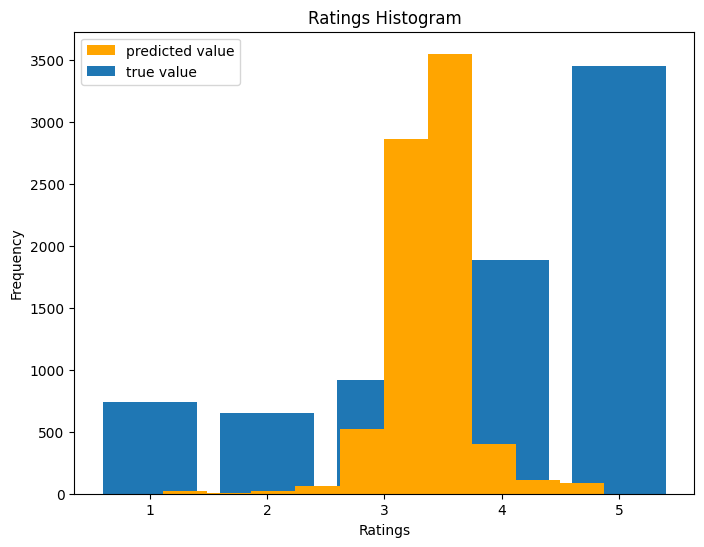

In [89]:
# Plotting the distribution of actual and predicted stars
import matplotlib.pyplot as plt
import seaborn as sns
values, counts = np.unique(df_test['stars'], return_counts=True)

plt.figure(figsize=(8,6))
plt.bar(values, counts, tick_label=['1','2','3','4','5'], label='true value')
plt.hist(predictions, color='orange', label='predicted value')
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.title("Ratings Histogram")
plt.legend()
plt.show()

In [90]:
#Cosine similarity

# Extract embeddings
emb = keras_model.get_layer('embedding_3')
emb_weights = emb.get_weights()[0]

print("The shape of embedded weights: ", emb_weights.shape)
print("The length of embedded weights: ", len(emb_weights))

The shape of embedded weights:  (309, 1)
The length of embedded weights:  309


In [91]:
# normalize and reshape embedded weights
emb_weights = emb_weights / np.linalg.norm(emb_weights, axis = 1).reshape((-1, 1))
len(emb_weights)

309

In [92]:
# get all unique business_ids (restaurants)
rest_id_emb = combined_business_data_keras["business_id"].unique()
len(rest_id_emb)

309

In [93]:
rest_pd = pd.DataFrame(emb_weights)
rest_pd["business_id"] = rest_id_emb
rest_pd = rest_pd.set_index("business_id")
rest_pd

0
business_id                
ltBBYdNzkeKdCNPDAsxwAA -1.0
Zx7n8mdt8OzLRXVzolXNhQ -1.0
eaJCpC6IhYphj7bwCDHTwQ  1.0
oQ5CPRt0R3AzFvcjNOqB1w  1.0
X_E7U2lVNEwbH_gpOBmAHQ  1.0
...                     ...
knMtp8FC6IJhh3X7ms_BCA  1.0
uHfHKZj_RsNwP03ar_vwQg  1.0
Xn5NRxcnoG1DbWnvkEGbFg  1.0
ct-moUWiNkO9a8wjge2CkQ  1.0
nsnehrg4TxUbO-6XrcZNFA  1.0

[309 rows x 1 columns]

In [94]:
# merging rest_pd and temp tables to get the name of the restaurants.
temp = combined_business_data_keras[['business_id', 'name']].drop_duplicates()
df_recommend = pd.merge(rest_pd, temp, on='business_id')
df_recommend

business_id    0                                 name
0    ltBBYdNzkeKdCNPDAsxwAA -1.0                               Tavern
1    Zx7n8mdt8OzLRXVzolXNhQ -1.0             Milk and Honey Nashville
2    eaJCpC6IhYphj7bwCDHTwQ  1.0                Three Brothers Coffee
3    oQ5CPRt0R3AzFvcjNOqB1w  1.0         Edley's Bar-B-Que - 12 South
4    X_E7U2lVNEwbH_gpOBmAHQ  1.0                       Cerveza Jack's
..                      ...  ...                                  ...
304  knMtp8FC6IJhh3X7ms_BCA  1.0                             Freshens
305  uHfHKZj_RsNwP03ar_vwQg  1.0  NashHouse Southern Spoon and Saloon
306  Xn5NRxcnoG1DbWnvkEGbFg  1.0                    SmoQe Signals BBQ
307  ct-moUWiNkO9a8wjge2CkQ  1.0                 Uptown Fruit Market 
308  nsnehrg4TxUbO-6XrcZNFA  1.0                      RocknRoll Sushi

[309 rows x 3 columns]

In [98]:
# exrtract the target restaurant from the df_recommend table
target = df_recommend[df_recommend['name'] == 'The Pancake Pantry']
target.iloc[:,1:51]

0                name
7  1.0  The Pancake Pantry

In [99]:
def find_similarity_total(rest_name):
    """Recommends restaurant based on the cosine similarity between restaurants"""
    cosine_list_total = []
    result = []

    for i in range(0, df_recommend.shape[0]):
        sample_name = df_recommend[df_recommend["name"] == rest_name].iloc[:,1:51]
        row = df_recommend.iloc[i,1:51]
        cosine_total = np.dot(sample_name, row)
        
        recommended_name = df_recommend.iloc[i,51]
        cosine_list_total.append(cosine_total)
        result.append(recommended_name)
        
    cosine_df_total = pd.DataFrame({"similar_rest" : result, "cosine" : cosine_list_total})

    return cosine_df_total

In [103]:
# call the function with input of "Wvrst" and store it in result variable.
#result = find_similarity_total('The Pancake Pantry')

In [ ]:
#https://www.kaggle.com/code/zolboo/recommender-systems-knn-svd-nn-keras/notebook

## Neural Collaborative Filtering (NCF)

In [1]:
#https://calvinfeng.gitbook.io/machine-learning-notebook/supervised-learning/recommender/neural_collaborative_filtering

#https://www.d2l.ai/chapter_recommender-systems/recsys-intro.html

#https://medium.com/data-science-in-your-pocket/recommendation-systems-using-neural-collaborative-filtering-ncf-explained-with-codes-21a97e48a2f7

In [17]:
import random
import warnings
import zipfile
from pathlib import Path

import pandas as pd
import tensorflow as tf
import tqdm
warnings.filterwarnings("ignore")

def load_ml_1m():
    # download and extract zip file
    tf.keras.utils.get_file(
        "ml-1m.zip",
        "http://files.grouplens.org/datasets/movielens/ml-1m.zip",
        cache_dir=".",
        cache_subdir=".",
        extract=True,
    )
    # read and merge data into same table
    cur_path = Path(".").absolute()
    ratings = pd.read_csv(
        cur_path / "ml-1m" / "ratings.dat",
        sep="::",
        usecols=[0, 1, 2, 3],
        names=["user", "item", "rating", "time"],
    )
    users = pd.read_csv(
        cur_path / "ml-1m" / "users.dat",
        sep="::",
        usecols=[0, 1, 2, 3],
        names=["user", "sex", "age", "occupation"],
    )
    items = pd.read_csv(
        cur_path / "ml-1m" / "movies.dat",
        sep="::",
        usecols=[0, 2],
        names=["item", "genre"],
        encoding="iso-8859-1",
    )
    items[["genre1", "genre2", "genre3"]] = (
        items["genre"].str.split(r"|", expand=True).fillna("missing").iloc[:, :3]
    )
    items.drop("genre", axis=1, inplace=True)
    data = ratings.merge(users, on="user").merge(items, on="item")
    data.rename(columns={"rating": "label"}, inplace=True)
    # random shuffle data
    data = data.sample(frac=1, random_state=42).reset_index(drop=True)
    return data

In [18]:
data = load_ml_1m()
data.shape

(1000209, 10)

In [21]:
#pip install LibRecommender
import numpy as np
import pandas as pd
from libreco.data import random_split, DatasetPure
from libreco.algorithms import NCF  # pure data, 
from libreco.evaluation import evaluate

data = data[["user", "item", "label", "time"]]
data.head()

user  item  label       time
0  5755   184      3  958280246
1  4585   519      3  964321944
2  1503  3114      4  974762175
3  2166   648      4  974614593
4  3201  2178      5  968626301

In [22]:
train_data, eval_data, test_data = random_split(data, multi_ratios=[0.8, 0.1, 0.1])

In [23]:
#Convert the pandas dataframe into a compatible datatype for LibRecommender
train_data, data_info= DatasetPure.build_trainset(train_data)
eval_data = DatasetPure.build_evalset(eval_data)
test_data = DatasetPure.build_testset(test_data)

In [ ]:
#hyperparameters 

#Task=rating/ranking
#Rating is usually used when we have a dataset around explicit feedback (direct rating, starts given by customers)
#The ranking is used when the dataset has implicit feedback (customer clicks, opens a webpage, etc)

In [24]:
#Configure NCF
ncf = NCF(
    task="rating",
    data_info=data_info,
    loss_type="cross_entropy",
    embed_size=16,
    n_epochs=10,
    lr=1e-3,
    batch_size=2048,
    num_neg=1,
)

In [25]:
#Next is to fit NCF and evaluate
# monitor metrics on eval data during training
ncf.fit(
    train_data,
    neg_sampling=False, #for rating, this param is false else True
    verbose=2,
    eval_data=eval_data,
    metrics=["loss"],
)

# do final evaluation on test data
evaluate(
    model=ncf,
    data=test_data,
    neg_sampling=False,
    metrics=["loss"],
)
#for implicit feedback, metrics like precision@k, recall@k, ndcg can be used

Training start time: 2023-08-08 13:19:40
Instructions for updating:
Colocations handled automatically by placer.


2023-08-08 13:19:40,186 - WARNING - From C:\Users\Abhishek Jaiswal\.conda\envs\mlenv\lib\site-packages\keras\layers\normalization\batch_normalization.py:561: _colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
train: 100%|████████████████████████████████████████████████████████████████████████| 782/782 [00:05<00:00, 133.44it/s]


Epoch 1 elapsed: 5.875s
	 train_loss: 1.8163


eval_pointwise: 100%|██████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 63.40it/s]


	 eval rmse: 0.9485


train: 100%|████████████████████████████████████████████████████████████████████████| 782/782 [00:05<00:00, 151.70it/s]


Epoch 2 elapsed: 5.160s
	 train_loss: 0.8423


eval_pointwise: 100%|██████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 91.70it/s]


	 eval rmse: 0.9291


train: 100%|████████████████████████████████████████████████████████████████████████| 782/782 [00:05<00:00, 136.16it/s]


Epoch 3 elapsed: 5.742s
	 train_loss: 0.7785


eval_pointwise: 100%|██████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 55.70it/s]


	 eval rmse: 0.9001


train: 100%|████████████████████████████████████████████████████████████████████████| 782/782 [00:05<00:00, 133.19it/s]


Epoch 4 elapsed: 5.875s
	 train_loss: 0.6944


eval_pointwise: 100%|██████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 68.60it/s]


	 eval rmse: 0.8895


train: 100%|████████████████████████████████████████████████████████████████████████| 782/782 [00:05<00:00, 144.37it/s]


Epoch 5 elapsed: 5.421s
	 train_loss: 0.6325


eval_pointwise: 100%|██████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 76.23it/s]


	 eval rmse: 0.8906


train: 100%|████████████████████████████████████████████████████████████████████████| 782/782 [00:05<00:00, 148.79it/s]


Epoch 6 elapsed: 5.262s
	 train_loss: 0.5932


eval_pointwise: 100%|██████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 64.88it/s]


	 eval rmse: 0.8968


train: 100%|████████████████████████████████████████████████████████████████████████| 782/782 [00:06<00:00, 116.51it/s]


Epoch 7 elapsed: 6.715s
	 train_loss: 0.5679


eval_pointwise: 100%|██████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 55.47it/s]


	 eval rmse: 0.8977


train: 100%|████████████████████████████████████████████████████████████████████████| 782/782 [00:06<00:00, 112.46it/s]


Epoch 8 elapsed: 6.957s
	 train_loss: 0.5487


eval_pointwise: 100%|██████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 65.83it/s]


	 eval rmse: 0.9005


train: 100%|████████████████████████████████████████████████████████████████████████| 782/782 [00:06<00:00, 114.08it/s]


Epoch 9 elapsed: 6.859s
	 train_loss: 0.5335


eval_pointwise: 100%|██████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 64.21it/s]


	 eval rmse: 0.9114


train: 100%|████████████████████████████████████████████████████████████████████████| 782/782 [00:06<00:00, 122.28it/s]


Epoch 10 elapsed: 6.402s
	 train_loss: 0.5201


eval_pointwise: 100%|██████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 77.59it/s]


	 eval rmse: 0.9080


eval_pointwise: 100%|██████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 81.47it/s]


{'loss': 0.90721756}

In [26]:
# predict preference of user 5755 to item 110
ncf.predict(user=5755, item=110)

# recommend 10items for user 5755
ncf.recommend_user(user=5755, n_rec=10)

{5755: array([1178, 3910, 2330,  608, 2351,  290, 1251, 1594, 1340,  593],
       dtype=int64)}